In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
plt.style.use('seaborn-darkgrid')

**Link**: [Avocado Prices](https://www.kaggle.com/neuromusic/avocado-prices)

**Context**

It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.
Clearly, they aren't buying home because they are buying too much Avocado Toast!
But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

**Content**

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [2]:
data = pd.read_csv("data/avocado.csv")

In [3]:
data = data.sort_values("Date")

---
## **1. EXPLORE THE DATA TO GAIN INSIGHTS**
---

In [4]:
data.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046      4225  \
11569          51  2015-01-04          1.75      27365.89  9307.34   3844.81   
9593           51  2015-01-04          1.49      17723.17  1189.35  15628.27   
10009          51  2015-01-04          1.68       2896.72   161.68    206.96   
1819           51  2015-01-04          1.52      54956.80  3013.04  35456.88   
9333           51  2015-01-04          1.64       1505.12     1.27   1129.50   

          4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
11569   615.28    13598.46    13061.10      537.36          0.0       organic   
9593      0.00      905.55      905.55        0.00          0.0       organic   
10009     0.00     2528.08     2528.08        0.00          0.0       organic   
1819   1561.70    14925.18    11264.80     3660.38          0.0  conventional   
9333      0.00      374.35      186.67      187.68          0.0       organic   

       year              region  
11569  2015           Southeast  
9593   2015             Chicago  
10009  2015  HarrisburgScranton  
1819   2015          Pittsburgh  
9333   2015               Boise

In [5]:
data.tail()

Unnamed: 0        Date  AveragePrice  Total Volume        4046  \
8574            0  2018-03-25          1.36     908202.13   142681.06   
9018            0  2018-03-25          0.70    9010588.32  3999735.71   
18141           0  2018-03-25          1.42     163496.70    29253.30   
17673           0  2018-03-25          1.70     190257.38    29644.09   
8814            0  2018-03-25          1.34    1774776.77    63905.98   

            4225       4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
8574   463136.28  174975.75   127409.04   103579.41    22467.04      1362.59   
9018   966589.50   30130.82  4014132.29  3398569.92   546409.74     69152.63   
18141    5080.04       0.00   129163.36   109052.26    20111.10         0.00   
17673   70982.10       0.00    89631.19    89424.11      207.08         0.00   
8814   908653.71     843.45   801373.63   774634.09    23833.93      2905.61   

               type  year        region  
8574   conventional  2018       Chicago  
9018   conventional  2018  SouthCentral  
18141       organic  2018  SouthCentral  
17673       organic  2018    California  
8814   conventional  2018       NewYork

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 11569 to 8814
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


In [7]:
data = data[(data["region"] != "TotalUS") & (data["region"] != "West") & (data["region"] != "Southeast") & (data["region"] != "SouthCentral") & (data["region"] != "Northeast")]
data["month_num"] = data["Date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").month)
data["month"] = data["Date"].map(lambda x: x[:7])

change_type = ["type", "region", "year", "month", "month_num"]
for change in change_type:
    data[change] = data[change].astype("category")

data["Date"] = pd.to_datetime(data["Date"])

In [8]:
data = data.drop("Unnamed: 0", axis = 1)

In [9]:
data["TotalSales"] = data["AveragePrice"] * data["Total Volume"]

In [10]:
data.describe()

AveragePrice  Total Volume          4046          4225           4770  \
count  16559.000000  1.655900e+04  1.655900e+04  1.655900e+04   16559.000000   
mean       1.412867  3.763563e+05  1.198058e+05  1.379739e+05   12554.829344   
std        0.405800  8.405697e+05  3.215597e+05  3.207020e+05   43624.637372   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00       0.000000   
25%        1.110000  9.485580e+03  6.741850e+02  2.535060e+03       0.000000   
50%        1.380000  8.473931e+04  5.542760e+03  2.393005e+04     129.600000   
75%        1.670000  3.560994e+05  8.843336e+04  1.121215e+05    4769.575000   
max        3.250000  1.121360e+07  4.794142e+06  4.097592e+06  704466.560000   

         Total Bags    Small Bags     Large Bags    XLarge Bags    TotalSales  
count  1.655900e+04  1.655900e+04   16559.000000   16559.000000  1.655900e+04  
mean   1.060205e+05  8.413905e+04   20194.411993    1687.002265  4.192286e+05  
std    2.431634e+05  2.114467e+05   51979.763106    7416.158497  9.071695e+05  
min    0.000000e+00  0.000000e+00       0.000000       0.000000  1.344504e+02  
25%    4.175940e+03  2.202220e+03      73.090000       0.000000  1.507373e+04  
50%    3.006675e+04  2.029952e+04    1984.720000       0.000000  1.099288e+05  
75%    9.106514e+04  7.090007e+04   14831.895000      77.780000  4.251450e+05  
max    3.462626e+06  3.403581e+06  832296.700000  131300.760000  8.715742e+06

In [11]:
data.describe(include = "category")

type   year             region  month_num    month
count          16559  16559              16559      16559    16559
unique             2      4                 49         12       39
top     conventional   2017  MiamiFtLauderdale          1  2017-04
freq            8281   5192                338       1764      490

- There are 2 types of avocado, conventional and organic.
- From the data, organic avocado have higher price than conventional avocado. The lower price on organic avocado looks like high price in conventional avocado.
- There are some anomalies from both types and tend to occurs at the same time if we use window size 15. We can change the window size and will get least anomalies. 
- Because the price from organic avocado is higher than conventional avocado, the total volume from organic avocado is lower than conventional avocado.
- If we take look average price for both types for each months, the price very lower at the beginning of year and will rise starting May. If we have business in this area, we need consider the price so we can still get a better profit. We need to know when is the best time to buy avocado.
- From the standard deviation, we know that in 2015, the price for both type tend to have the same price. Different with 2016 and 2017, avocado price from 1 place to other place have higher difference. We must carefull when we want to buy avocado from some place because we can find the better place with lower price and we can mantain our profit.
- In 2017, price tend to be higher than the previous year, only once the price is lower than the previous year.
- The total volume by organic avocado tend to be positive changes if we compare with previous year. Different with organic avocado, conventional seems to be not consistent especially in year 2017, the volume have negative changes if compare with previous year. In the past three years, organic avocado have a positive growth, need to consider if we want to invest more on organic avocado.
- based on region, South central have the lowest average price compare with other region. but because the South central have the lowest price, It became have the high volume compare to other region. West region have a unique case where the average price is not low but the sales volume is high. Maybe in this area have a higher needed in avocado compare to other region, so the people still buy the avocado even the price is high.

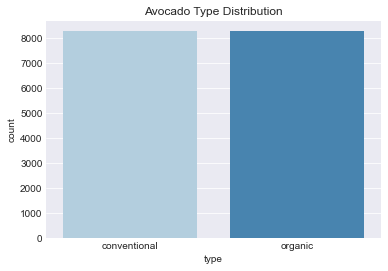

In [12]:
sns.countplot(x = "type", data = data, palette = "Blues")
plt.title("Avocado Type Distribution")
plt.show()

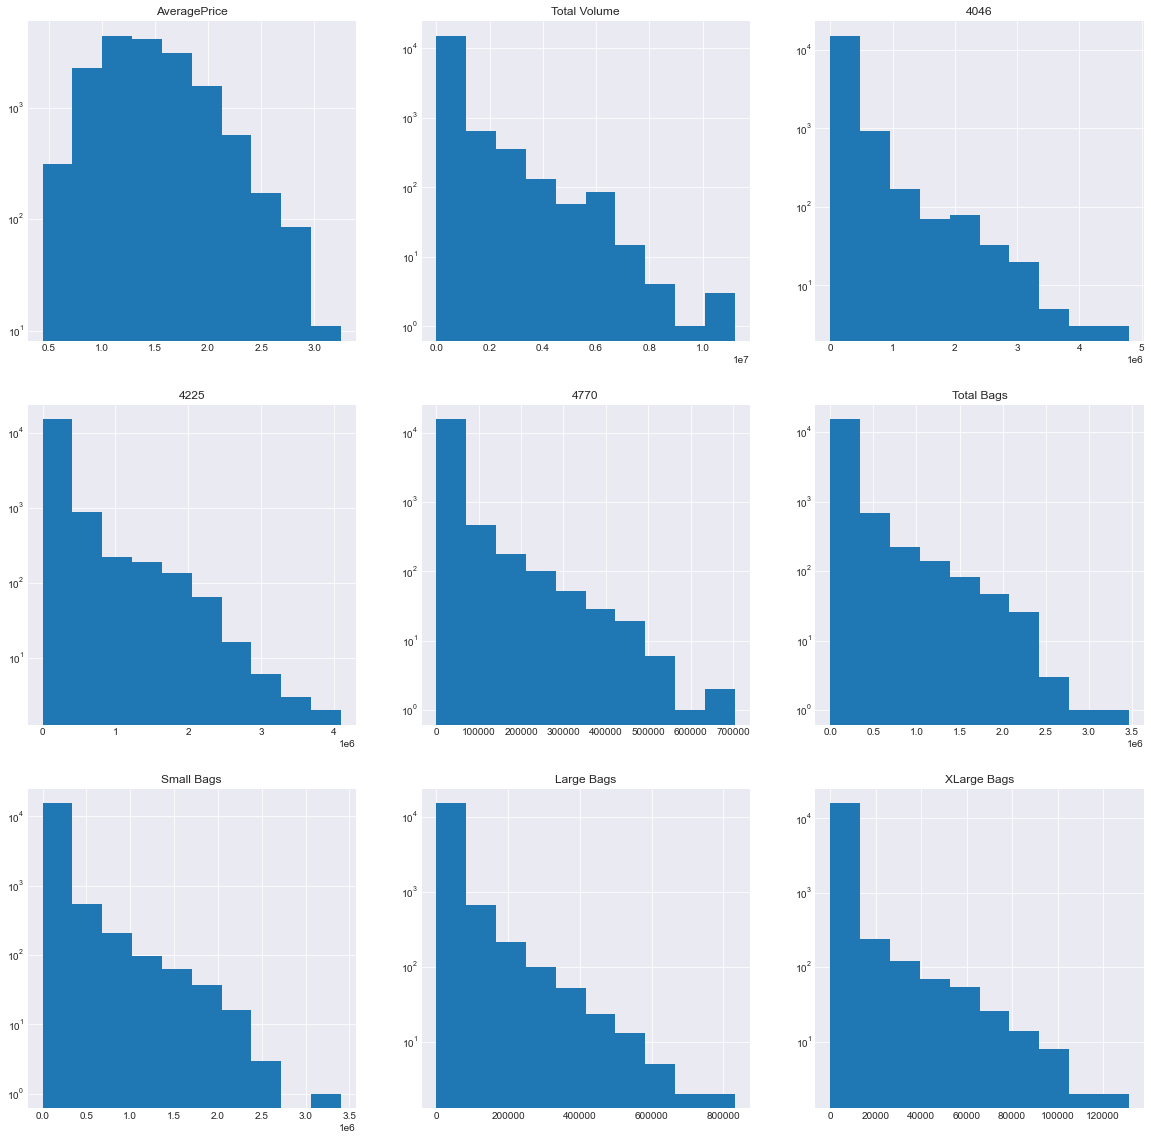

In [13]:
nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows, ncols, figsize = (20, 20))
for nrow in range(nrows):
    for ncol in range(ncols):
        ax[nrow, ncol].hist(data[data.select_dtypes("float").columns[(nrow * ncols) + ncol]],
                            log = True)
        ax[nrow, ncol].set_title(data.select_dtypes("float").columns[(nrow * ncols) + ncol])

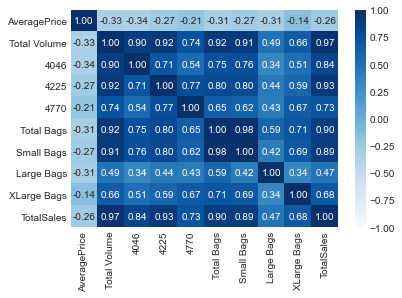

In [14]:
sns.heatmap(data.corr(), annot = True,
            fmt = ".2f", cmap = "Blues",
            vmin = -1, vmax = 1)
plt.show()

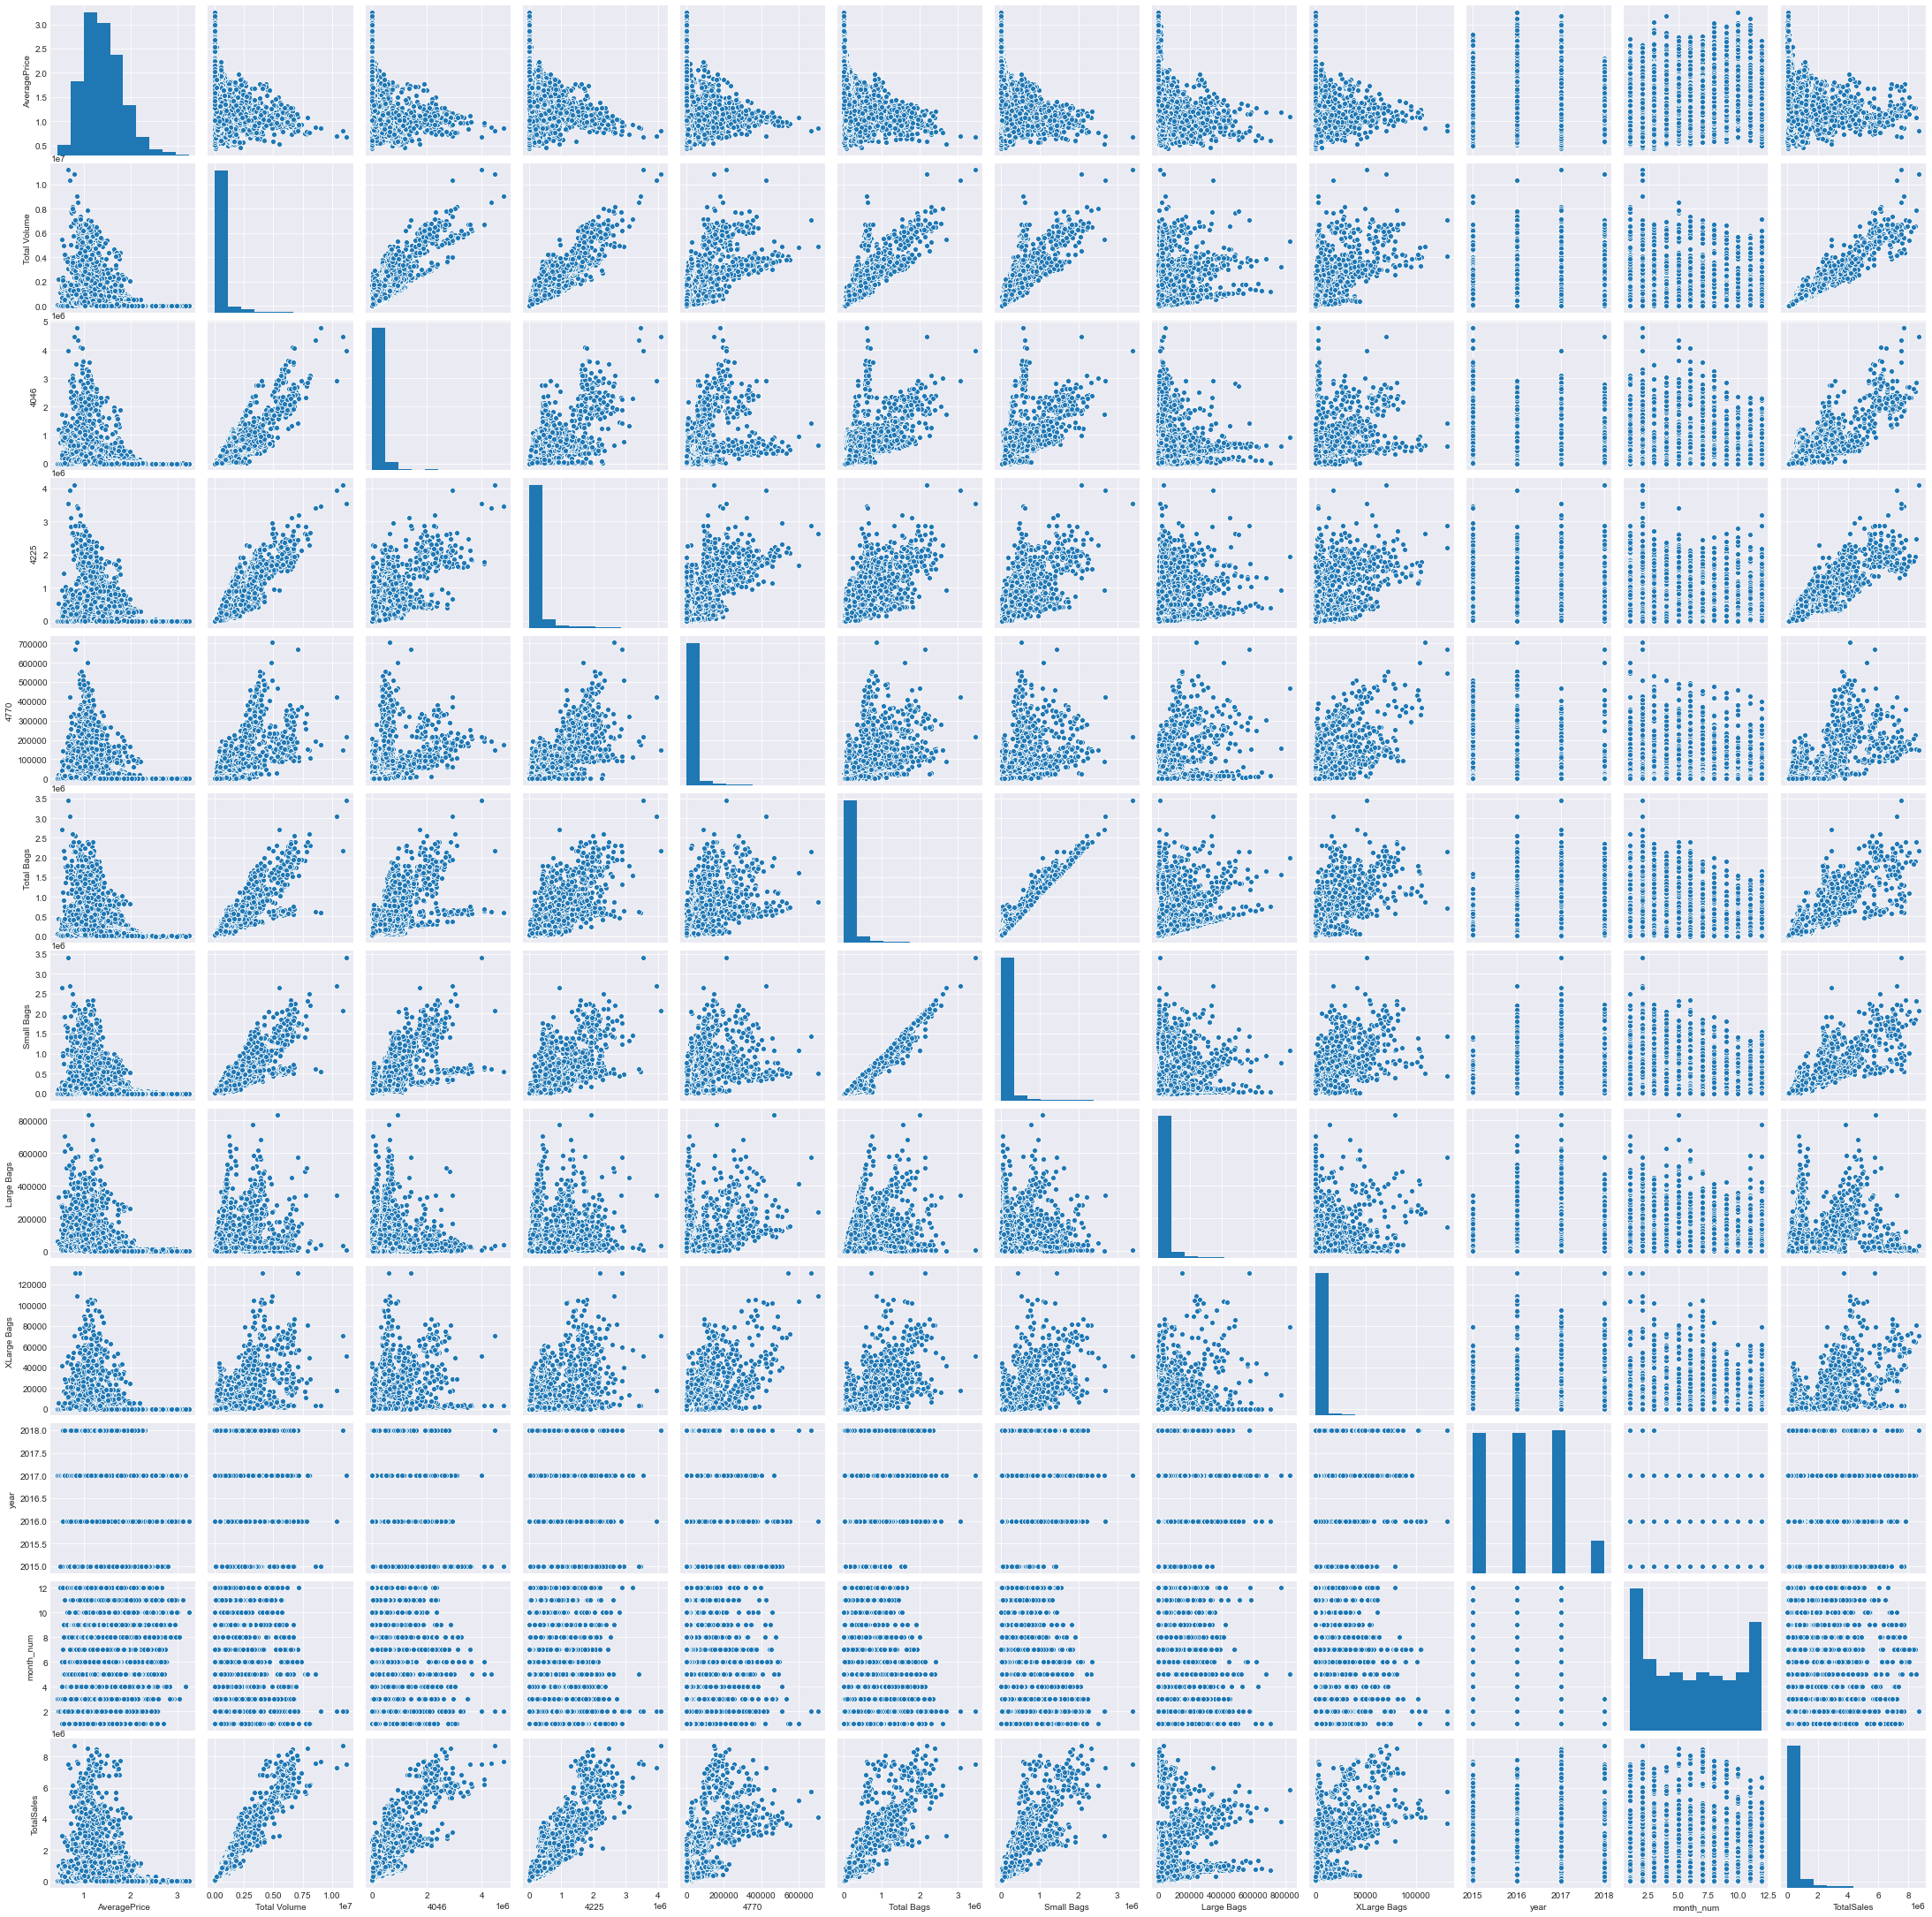

In [15]:
sns.pairplot(data, palette = "Blues")
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


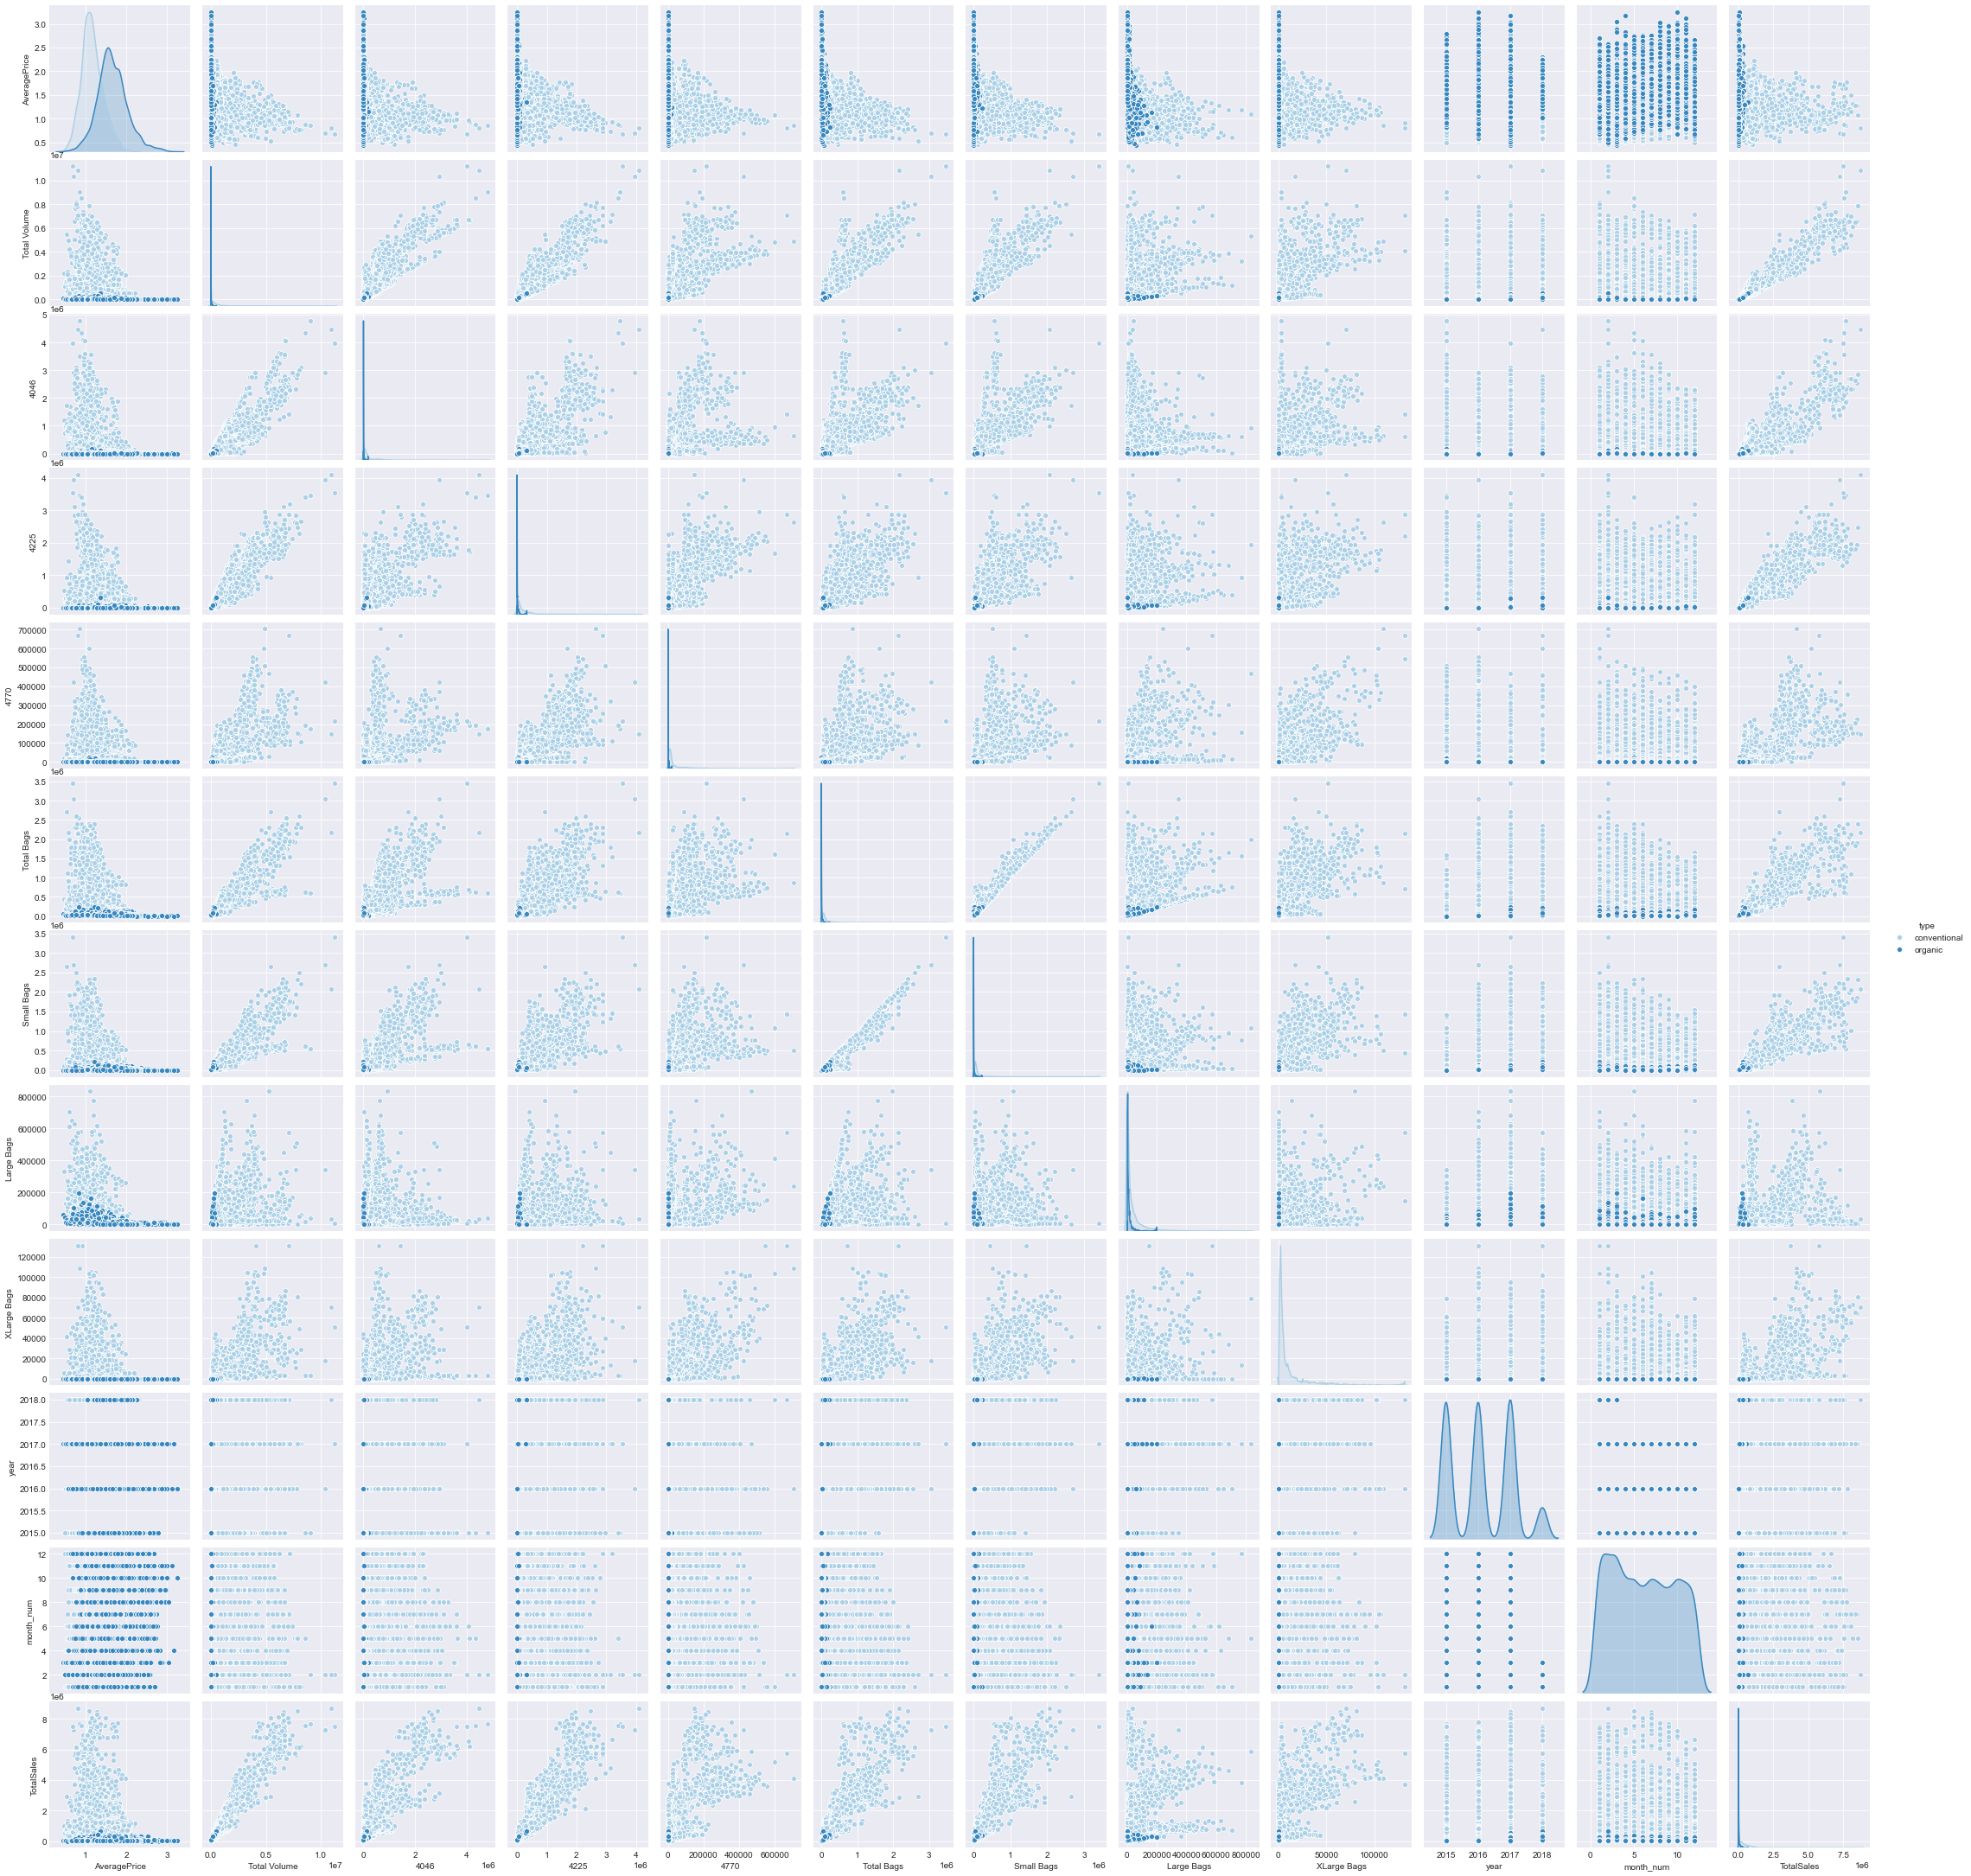

In [16]:
sns.pairplot(data, hue = "type", palette = "Blues")

In [17]:
def moving_average(x, window_size, robust = False):
    x = np.array(x)
    n_data = len(x)
    x_ma = np.zeros(n_data)
    for i in range(n_data):
        if i < window_size:
            subset = x[0:i + 1]
        else:
            subset = x[i - window_size:i]
        if robust:
            mean = np.median(subset)
        else:
            mean = subset.mean()
        x_ma[i] = mean
    return x_ma

def moving_std(x, window_size):
    x = np.array(x)
    n_data = len(x)
    x_ma = np.zeros(n_data)
    for i in range(n_data):
        if i < window_size:
            subset = x[0:i + 1]
        else:
            subset = x[i - window_size:i]
        std = subset.std()
        x_ma[i] = std
    return x_ma

def ma_graph(features, data, data_gr = "line", anomaly_gr = False, band = None, title = "No Title", row = None, col = None):
    data_ma = moving_average(data[features], window_size=window_size, robust=robust)
    data_std = moving_std(data[features], window_size=window_size)
    lower_band = data_ma - threshold * data_std
    upper_band = data_ma + threshold * data_std
    if anomaly_gr:
        anomaly_index = np.where((data[features] > upper_band) | (data[features] < lower_band))[0]
    
    if data_gr == "line":
        ax[row, col].plot(data["Date"], data[features], label = data[features].name)
    elif data_gr == "bar":
        ax[row, col].bar(data["Date"], data[features], width = 5, color = "steelblue")
    
    if band == True:
        ax[row, col].plot(data["Date"], data_ma, color = "orange", label = "Moving Average")
        ax[row, col].fill_between(x = data["Date"], y1 = lower_band, y2 = upper_band, color = "silver", alpha = 0.5)
    elif band == False:
        ax[row, col].plot(data["Date"], [data[features].max()] * len(data["Date"]), color = "blue", label = "Max")
        ax[row, col].plot(data["Date"], [data[features].min()] * len(data["Date"]), color = "red", label = "Min")
    
    if anomaly_gr:
        ax[row, col].plot(data["Date"][anomaly_index],data[features][anomaly_index], "x", color="red", label="Anomaly")
    ax[row, col].set_title(title)
    ax[row, col].legend()

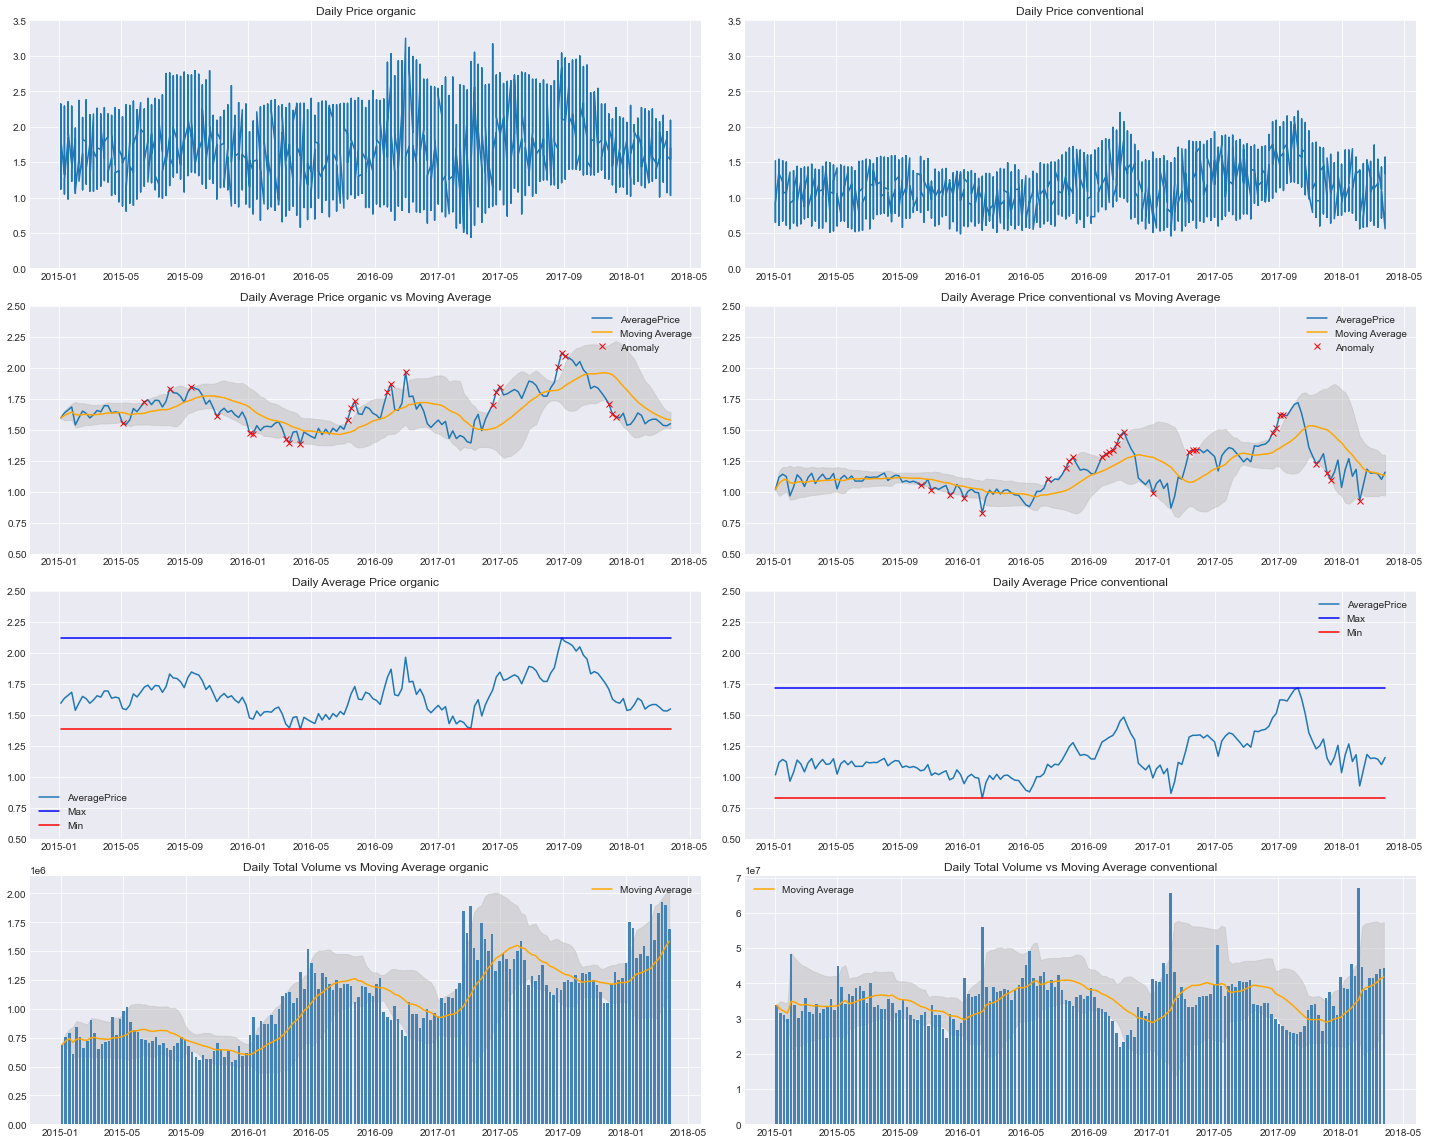

In [18]:
threshold = 2
window_size = 15
robust = False

fig, ax = plt.subplots(4, 2, figsize = (20, 16))
for ncol in range(len(data["type"].unique())):
    ax[0, ncol].plot(data[data["type"] == data["type"].unique()[ncol]]["Date"], data[data["type"] == data["type"].unique()[ncol]]["AveragePrice"])
    ax[0, ncol].set_title("Daily Price " + data["type"].unique()[ncol])
    ma_graph("AveragePrice", data[data["type"] == data["type"].unique()[ncol]].groupby("Date").mean().reset_index().dropna(),
             data_gr = "line", anomaly_gr = True, band = True, row = 1, col = ncol, title = "Daily Average Price " + data["type"].unique()[ncol] + " vs Moving Average")
    ma_graph("AveragePrice", data[data["type"] == data["type"].unique()[ncol]].groupby("Date").mean().reset_index().dropna(),
             data_gr = "line", anomaly_gr = False, band = False, row = 2, col = ncol, title = "Daily Average Price " + data["type"].unique()[ncol])
    ma_graph("Total Volume", data[data["type"] == data["type"].unique()[ncol]].groupby("Date").sum().reset_index().dropna(),
             data_gr = "bar", anomaly_gr = False, band = True, row = 3, col = ncol, title = "Daily Total Volume vs Moving Average " + data["type"].unique()[ncol])
    ax[0, ncol].set_ylim(0, 3.5)
    ax[1, ncol].set_ylim(0.5, 2.5)
    ax[2, ncol].set_ylim(0.5, 2.5)
plt.tight_layout()
plt.show()

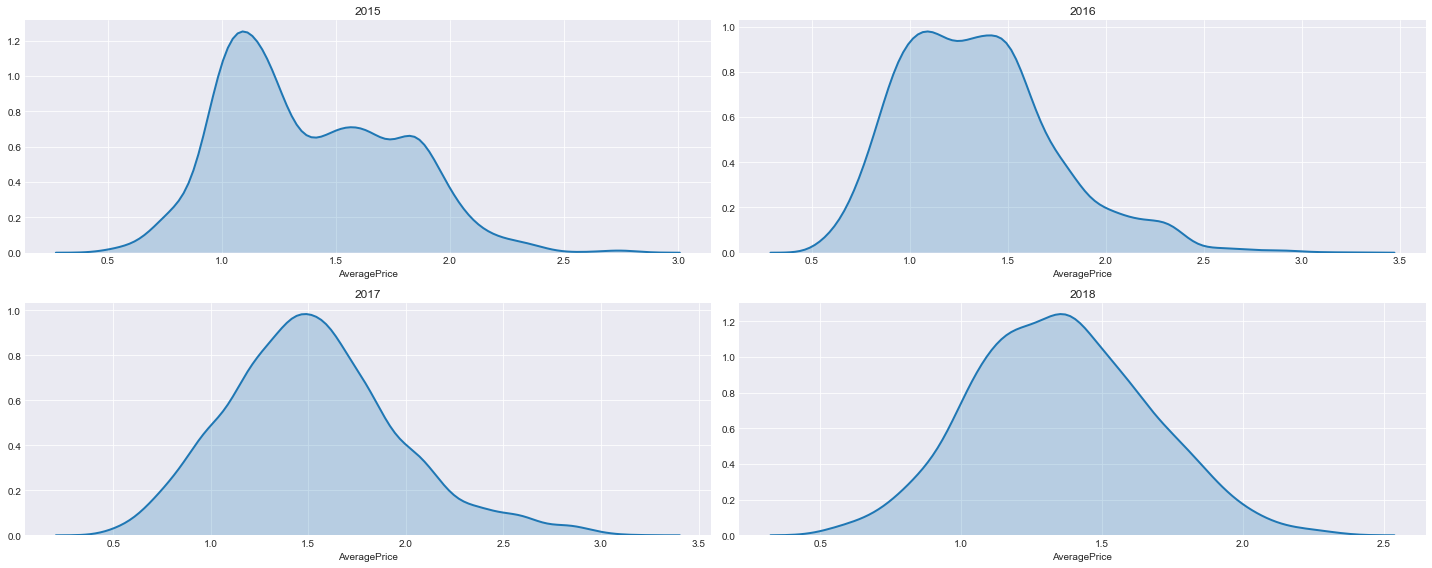

In [19]:
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize = (20, 8))
for nrow in range(nrows):
    for ncol in range(ncols):
        sns.distplot(data[data["year"] == data["year"].unique()[(nrow * ncols) + ncol]]["AveragePrice"],
                     hist = False, ax = ax[nrow, ncol],
                     kde_kws = {'shade': True, 'linewidth': 2})
        ax[nrow, ncol].set_title(data["year"].unique()[(nrow * ncols) + ncol])
plt.tight_layout()
plt.show()

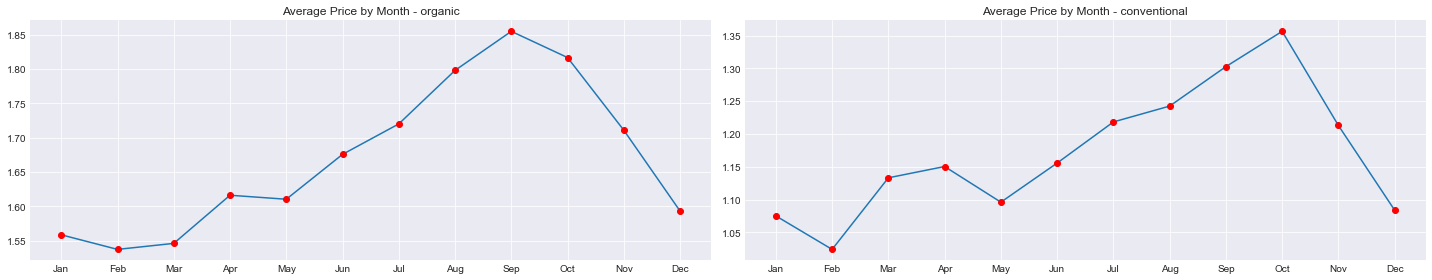

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (20, 4))
for ncol in range(len(data["type"].unique())):
    ax[ncol].plot("month_num", "AveragePrice",
             data = data[data["type"] == data["type"].unique()[ncol]].groupby("month_num").mean().reset_index(),
             marker = "o", markerfacecolor = "red", markeredgecolor = "red")
    ax[ncol].set_title("Average Price by Month - " + data["type"].unique()[ncol])

plt.setp(ax, xticks = range(len(data["month_num"].unique())),
         xticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

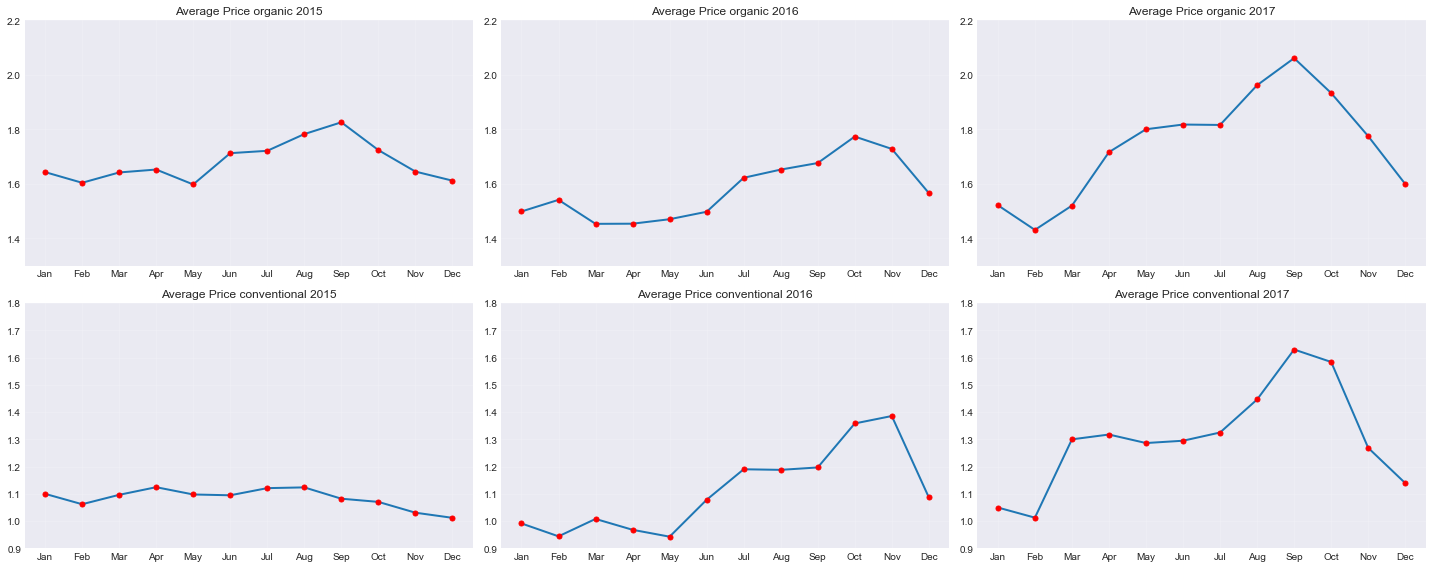

In [21]:
fig, ax = plt.subplots(2, 3, figsize = (20, 8))
for nrow in range(len(data["type"].unique())):
    for ncol in range(3):
        ax[nrow, ncol].plot("month_num", "AveragePrice",
                            data = data[(data["type"] == data["type"].unique()[nrow]) & (data["year"] == 2015 + ncol)].groupby("month_num").mean().reset_index(),
                            marker = "o", markerfacecolor = "red", markeredgecolor = "red", markersize = 5, linewidth = 2)
        if nrow == 0:
            ax[nrow, ncol].set_ylim(1.3, 2.2)
        else:
            ax[nrow, ncol].set_ylim(0.9, 1.8)
        ax[nrow, ncol].grid(alpha = 0.2)
        ax[nrow, ncol].set_title("Average Price " + data["type"].unique()[nrow] + " " + str(2015 + ncol))

plt.setp(ax, xticks = range(len(data["month_num"].unique())),
         xticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

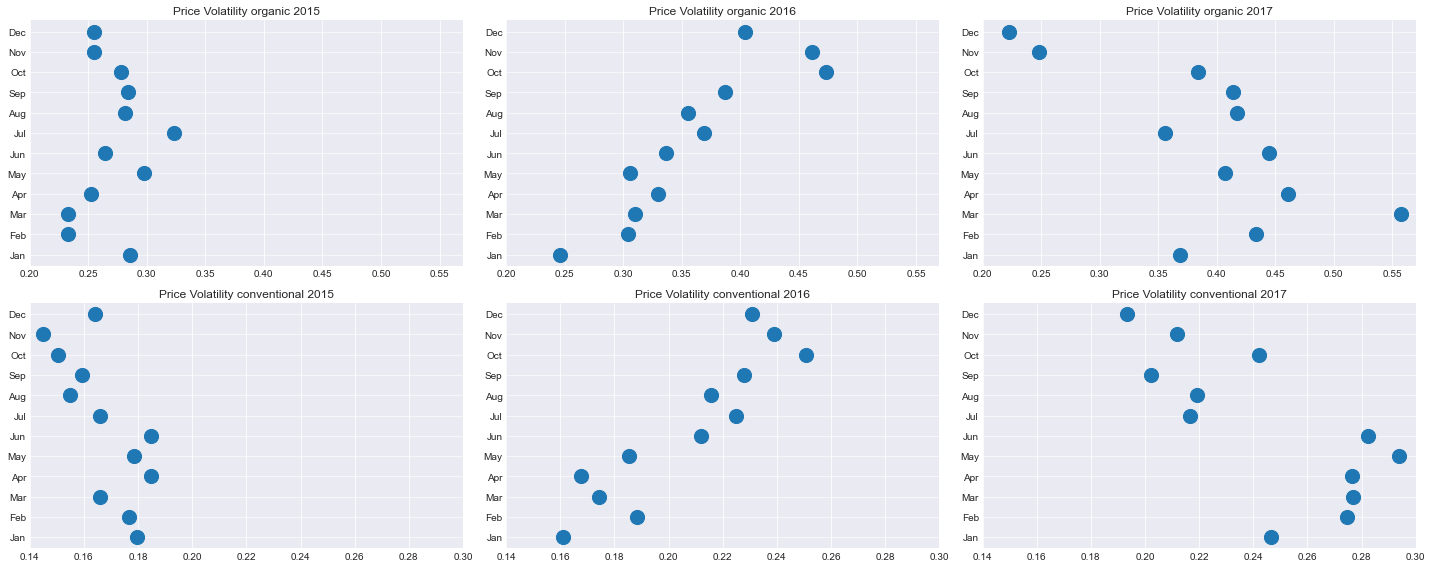

In [22]:
fig, ax = plt.subplots(2, 3, figsize = (20, 8))
for nrow in range(len(data["type"].unique())):
    for ncol in range(3):
        ax[nrow, ncol].scatter("AveragePrice", "month_num",
                      data = data[(data["type"] == data["type"].unique()[nrow]) & (data["year"] == 2015 + ncol)].groupby("month_num").std().reset_index(), s = 200)
        if nrow == 0:
            ax[nrow, ncol].set_xlim(0.2, 0.57)
        else:
            ax[nrow, ncol].set_xlim(0.14, 0.3)
        ax[nrow, ncol].grid(axis = "y", alpha = 0.75)
        ax[nrow, ncol].set_title("Price Volatility " + data["type"].unique()[nrow] + " " + str(2015 + ncol))

plt.setp(ax, yticks = data["month_num"].unique(),
         yticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

In [23]:
diff_mean = data[data["Date"] <= "2018-01-01"].groupby(["type", "month_num", "year"]).mean().reset_index()
diff_mean = diff_mean.dropna()
diff_mean["diff_avg_price"] = diff_mean["AveragePrice"].diff()
diff_mean["diff_avg_price"] = diff_mean["diff_avg_price"] / diff_mean["AveragePrice"]

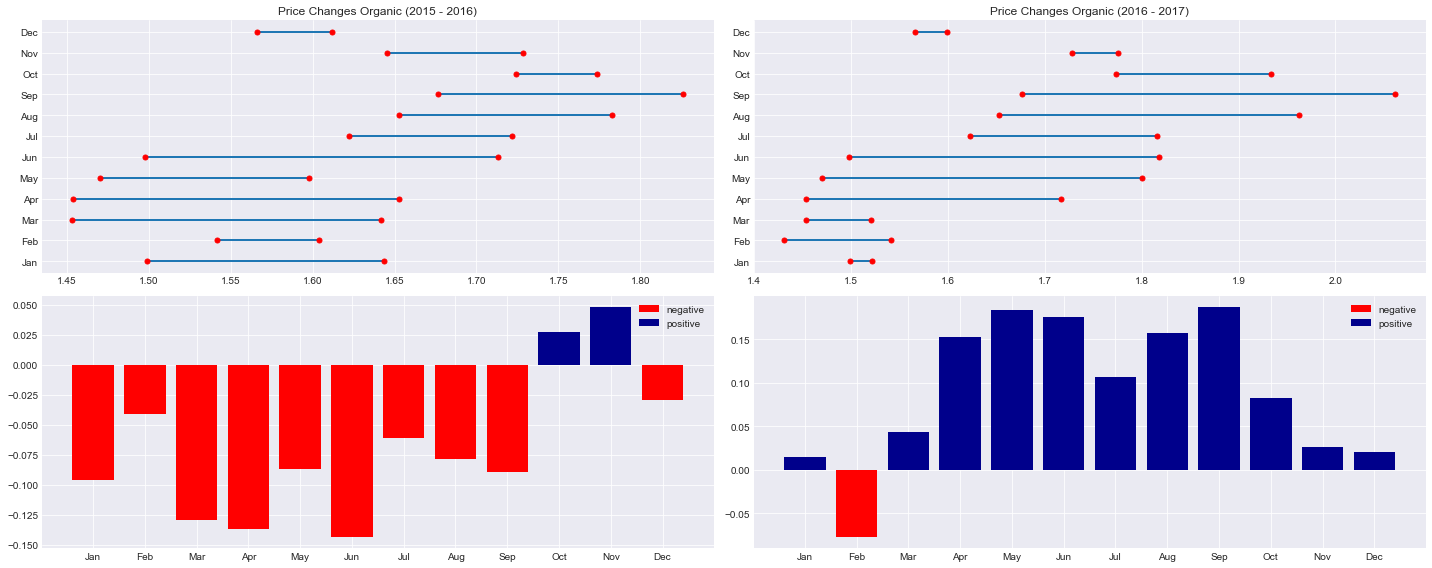

In [24]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
for ncol in range(2):
    ax[0, ncol].plot("AveragePrice", "month_num",
               data = data[(data["type"] == "organic") & ((data["year"] == 2015 + ncol) | (data["year"] == 2016 + ncol))].groupby(["month_num", "year"]).mean().reset_index(),
               marker = "o", markerfacecolor = "red", markeredgecolor = "red", markersize = 5, linewidth = 2)
    ax[1, ncol].bar("month_num", "diff_avg_price",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["type"] == "organic") & (diff_mean["diff_avg_price"] < 0)], color = "red", label = "negative")
    ax[1, ncol].bar("month_num", "diff_avg_price",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["type"] == "organic") & (diff_mean["diff_avg_price"] >= 0)], color = "darkblue", label = "positive")
    ax[0, ncol].set_title("Price Changes Organic (" + str(2015 + ncol) + " - " + str(2016 + ncol) + ")")
    ax[1, ncol].legend()
    plt.setp(ax[0, ncol], yticks = range(len(data["month_num"].unique())),
             yticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.setp(ax[1, ncol], xticks = diff_mean["month_num"].unique(),
             xticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

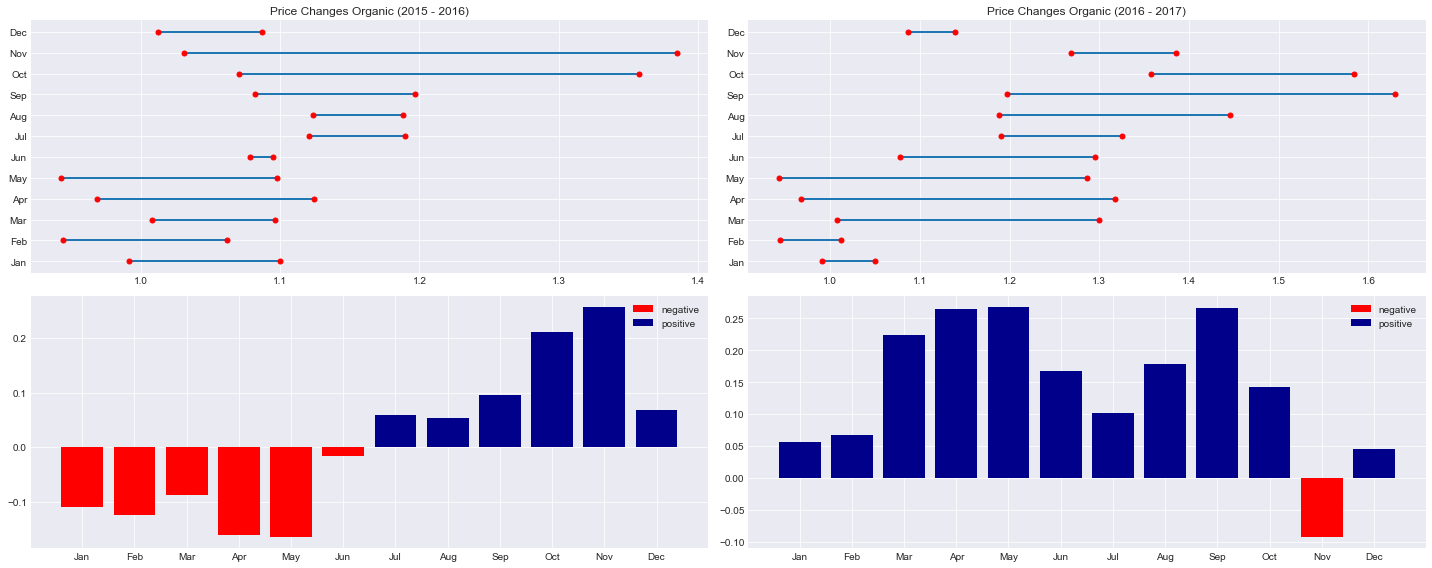

In [25]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
for ncol in range(2):
    ax[0, ncol].plot("AveragePrice", "month_num",
               data = data[(data["type"] == "conventional") & ((data["year"] == 2015 + ncol) | (data["year"] == 2016 + ncol))].groupby(["month_num", "year"]).mean().reset_index(),
               marker = "o", markerfacecolor = "red", markeredgecolor = "red", markersize = 5, linewidth = 2)
    ax[1, ncol].bar("month_num", "diff_avg_price",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["type"] == "conventional") & (diff_mean["diff_avg_price"] < 0)], color = "red", label = "negative")
    ax[1, ncol].bar("month_num", "diff_avg_price",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["type"] == "conventional") & (diff_mean["diff_avg_price"] >= 0)], color = "darkblue", label = "positive")
    ax[0, ncol].set_title("Price Changes Organic (" + str(2015 + ncol) + " - " + str(2016 + ncol) + ")")
    ax[1, ncol].legend()
    plt.setp(ax[0, ncol], yticks = range(len(data["month_num"].unique())),
             yticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.setp(ax[1, ncol], xticks = diff_mean["month_num"].unique(),
             xticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

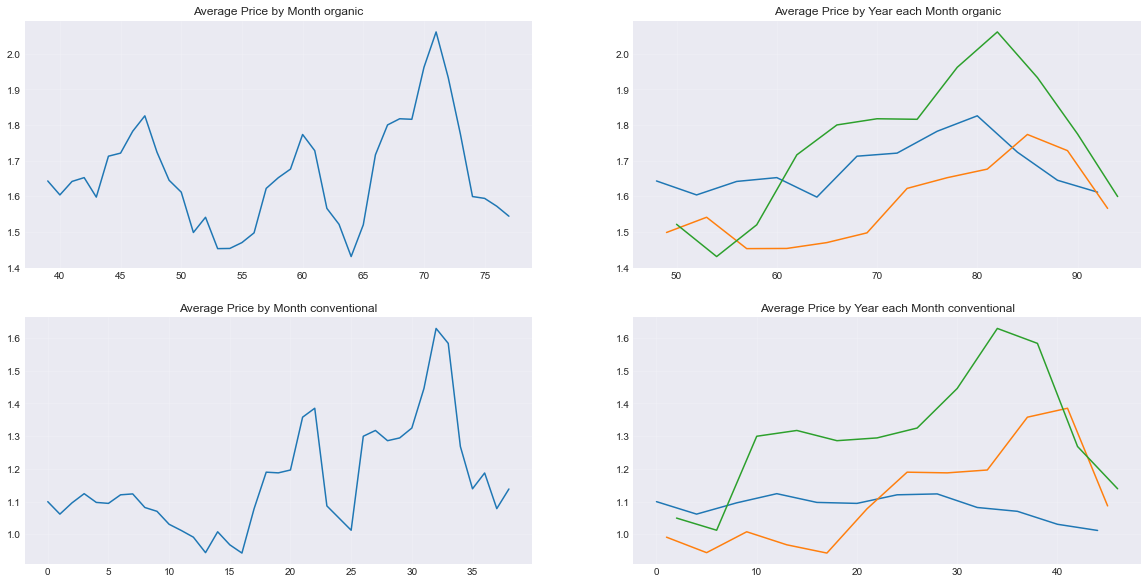

In [26]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
for nrow in range(2):
    ax[nrow, 0].plot("AveragePrice", data = data[data["type"] == data["type"].unique()[nrow]].groupby(["type", "month"]).mean().reset_index())
    ax[nrow, 0].set_title("Average Price by Month " + data["type"].unique()[nrow])
    ax[nrow, 0].grid(alpha = 0.2)
    for year in range(3):
        ax[nrow, 1].plot("AveragePrice", data = data[(data["type"] == data["type"].unique()[nrow]) & (data["year"] == 2015 + year)].groupby(["type", "month_num", "year"]).mean().reset_index().dropna())
        ax[nrow, 1].set_title("Average Price by Year each Month " + data["type"].unique()[nrow])
    ax[nrow, 1].grid(alpha = 0.2)
plt.show()

<BarContainer object of 2 artists>

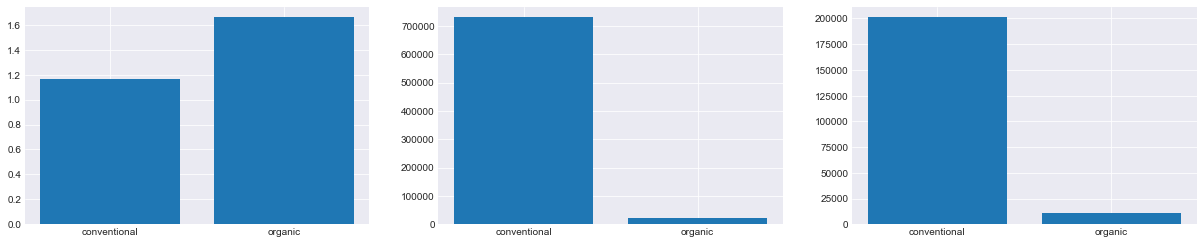

In [27]:
data_graph = data.groupby("type").mean().reset_index().dropna()
fig, ax = plt.subplots(1, 3, figsize = (21, 4))
ax[0].bar("type", "AveragePrice", data = data_graph)
ax[1].bar("type", "Total Volume", data = data_graph)
ax[2].bar("type", "Total Bags", data = data_graph)

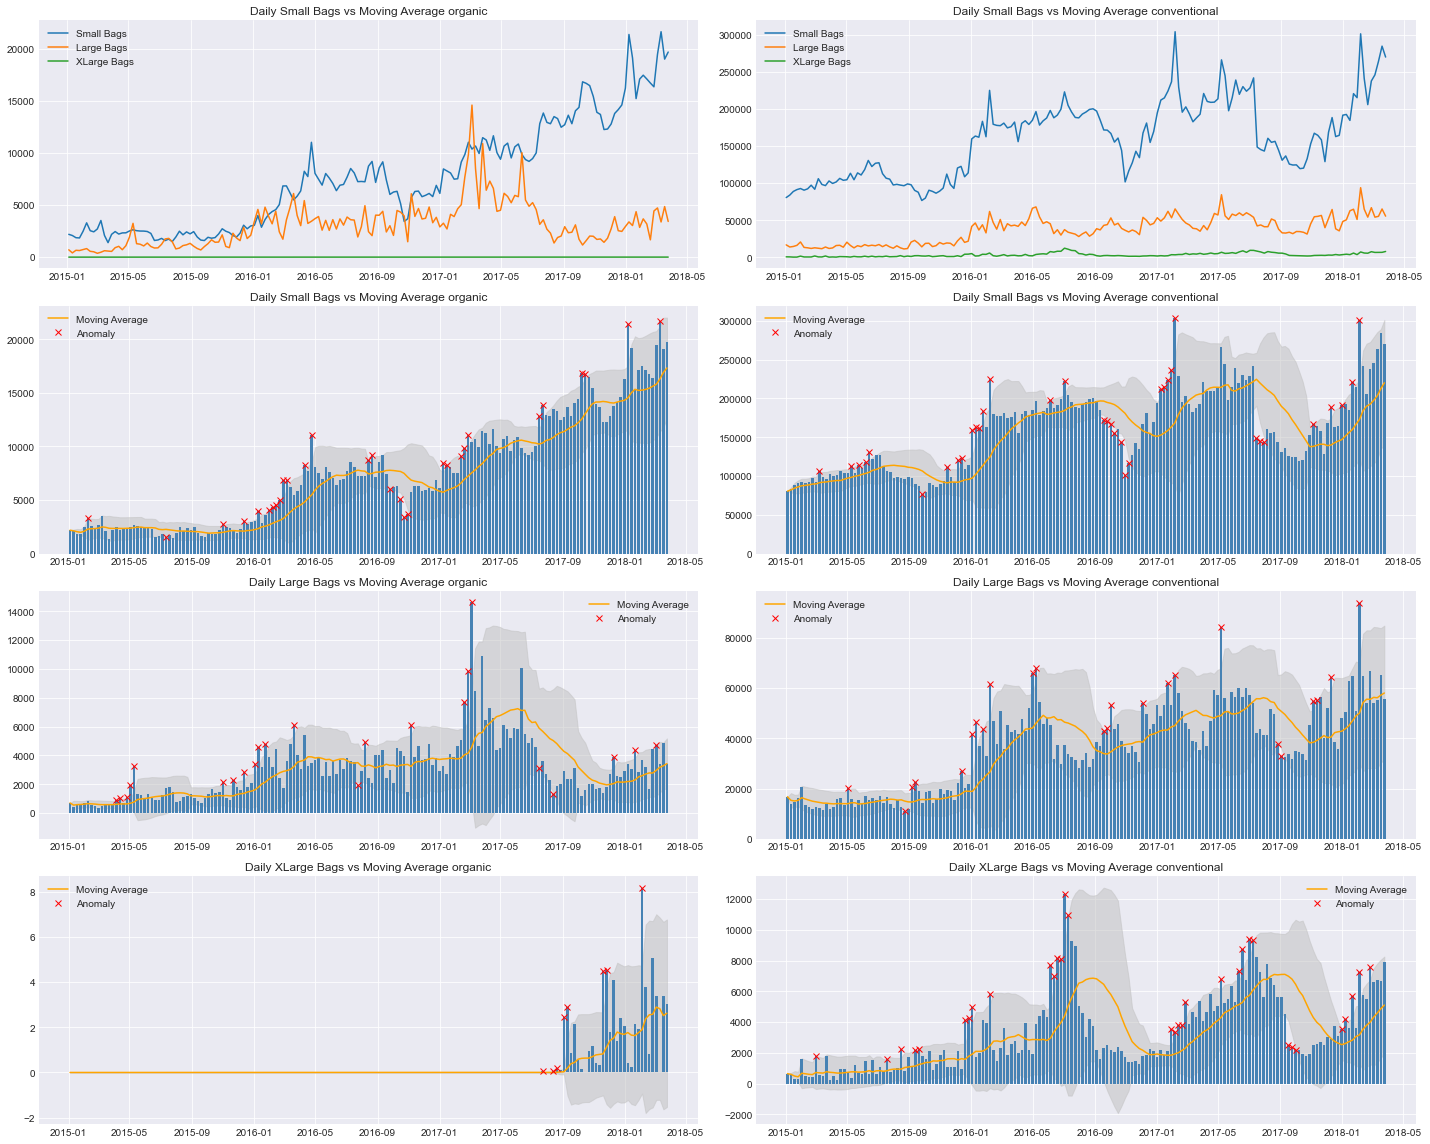

In [28]:
threshold = 2
window_size = 15
robust = False

fig, ax = plt.subplots(4, 2, figsize = (20, 16))
for ncol in range(len(data["type"].unique())):
    ma_graph("Small Bags", data[data["type"] == data["type"].unique()[ncol]].groupby("Date").mean().reset_index().dropna(),
             data_gr = "line", anomaly_gr = False, band = None, row = 0, col = ncol, title = "Daily Small Bags vs Moving Average " + data["type"].unique()[ncol])
    ma_graph("Large Bags", data[data["type"] == data["type"].unique()[ncol]].groupby("Date").mean().reset_index().dropna(),
             data_gr = "line", anomaly_gr = False, band = None, row = 0, col = ncol, title = "Daily Small Bags vs Moving Average " + data["type"].unique()[ncol])
    ma_graph("XLarge Bags", data[data["type"] == data["type"].unique()[ncol]].groupby("Date").mean().reset_index().dropna(),
             data_gr = "line", anomaly_gr = False, band = None, row = 0, col = ncol, title = "Daily Small Bags vs Moving Average " + data["type"].unique()[ncol])
    ma_graph("Small Bags", data[data["type"] == data["type"].unique()[ncol]].groupby("Date").mean().reset_index().dropna(),
             data_gr = "bar", anomaly_gr = True, band = True, row = 1, col = ncol, title = "Daily Small Bags vs Moving Average " + data["type"].unique()[ncol])
    ma_graph("Large Bags", data[data["type"] == data["type"].unique()[ncol]].groupby("Date").mean().reset_index().dropna(),
             data_gr = "bar", anomaly_gr = True, band = True, row = 2, col = ncol, title = "Daily Large Bags vs Moving Average " + data["type"].unique()[ncol])
    ma_graph("XLarge Bags", data[data["type"] == data["type"].unique()[ncol]].groupby("Date").mean().reset_index().dropna(),
             data_gr = "bar", anomaly_gr = True, band = True, row = 3, col = ncol, title = "Daily XLarge Bags vs Moving Average " + data["type"].unique()[ncol])
plt.tight_layout()
plt.show()

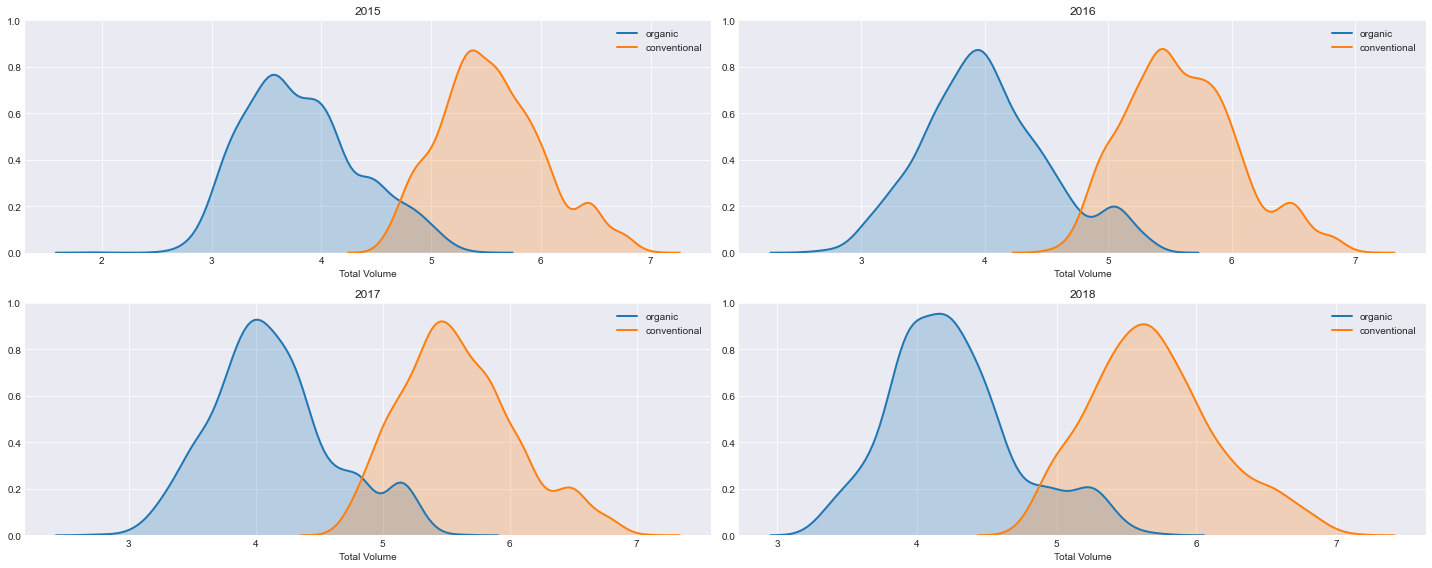

In [29]:
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize = (20, 8))
for nrow in range(nrows):
    for ncol in range(ncols):
        for types in data["type"].unique():
            sns.distplot(np.log10(data[(data["year"] == data["year"].unique()[(nrow * ncols) + ncol]) & (data["type"] == types)]["Total Volume"]),
                         hist = False, ax = ax[nrow, ncol],
                         kde_kws = {'shade': True, 'linewidth': 2},
                         label = types)
            ax[nrow, ncol].set_title(data["year"].unique()[(nrow * ncols) + ncol])
            ax[nrow, ncol].set_ylim(0, 1)
plt.tight_layout()
plt.show()

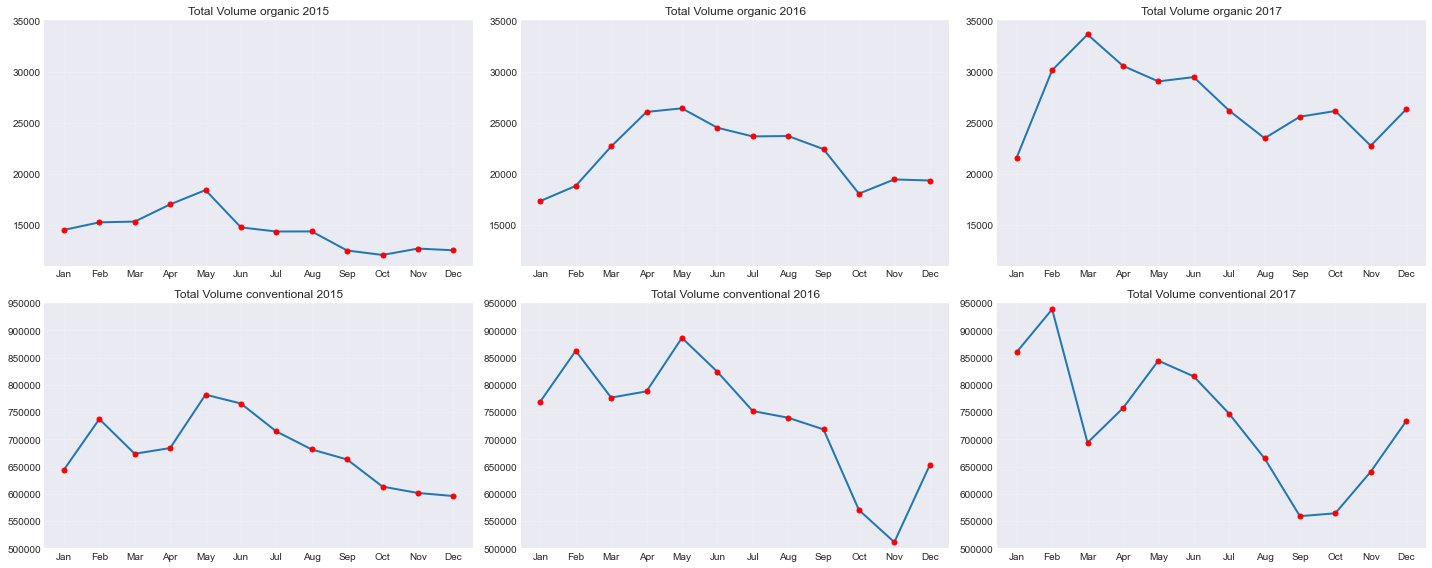

In [30]:
fig, ax = plt.subplots(2, 3, figsize = (20, 8))
for nrow in range(len(data["type"].unique())):
    for ncol in range(3):
        ax[nrow, ncol].plot("month_num", "Total Volume",
                            data = data[(data["type"] == data["type"].unique()[nrow]) & (data["year"] == 2015 + ncol)].groupby("month_num").mean().reset_index(),
                            marker = "o", markerfacecolor = "red", markeredgecolor = "red", markersize = 5, linewidth = 2)
        if nrow == 0:
            ax[nrow, ncol].set_ylim(11000, 35000)
        else:
            ax[nrow, ncol].set_ylim(500000, 950000)
        ax[nrow, ncol].grid(alpha = 0.2)
        ax[nrow, ncol].set_title("Total Volume " + data["type"].unique()[nrow] + " " + str(2015 + ncol))

plt.setp(ax, xticks = range(len(data["month_num"].unique())),
         xticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

In [31]:
diff_mean = data[data["Date"] <= "2018-01-01"].groupby(["type", "month_num", "year"]).mean().reset_index()
diff_mean = diff_mean.dropna()
diff_mean["diff_total_volume"] = diff_mean["Total Volume"].diff()
# diff_mean["diff_total_sales"] = diff_mean["diff_total_sales"] / diff_mean["TotalSales"]

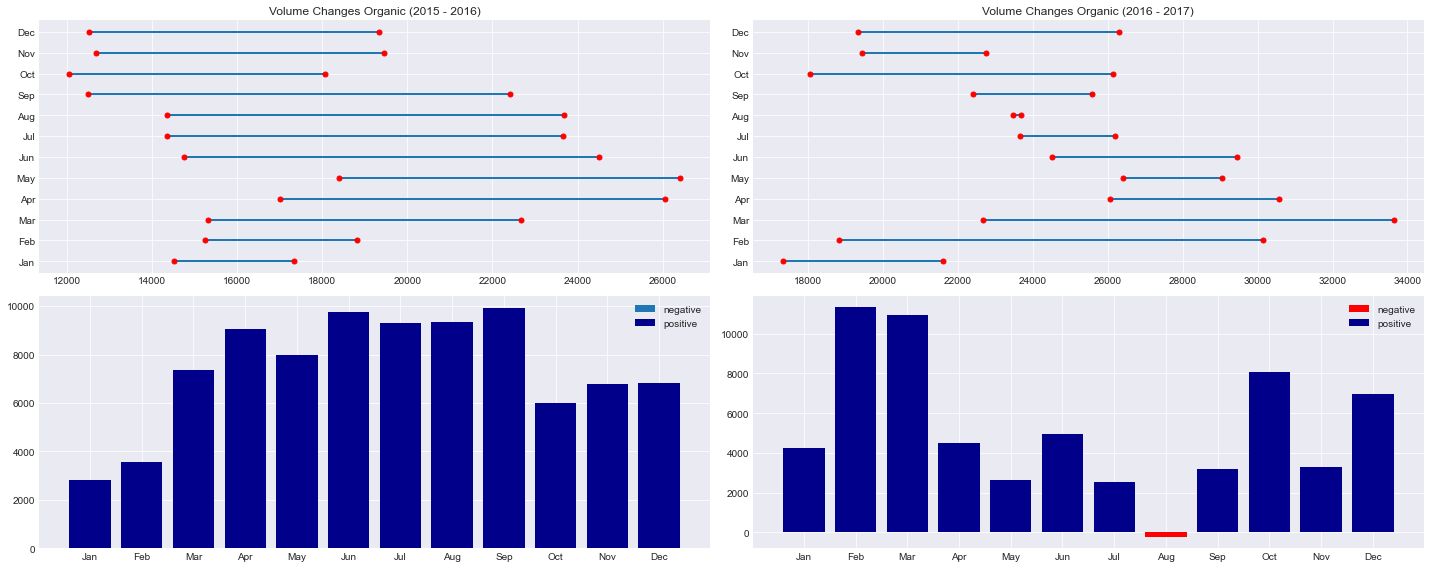

In [32]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
for ncol in range(2):
    ax[0, ncol].plot("Total Volume", "month_num",
               data = data[(data["type"] == "organic") & ((data["year"] == 2015 + ncol) | (data["year"] == 2016 + ncol))].groupby(["month_num", "year"]).mean().reset_index(),
               marker = "o", markerfacecolor = "red", markeredgecolor = "red", markersize = 5, linewidth = 2)
    ax[1, ncol].bar("month_num", "diff_total_volume",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["type"] == "organic") & (diff_mean["diff_total_volume"] < 0)], color = "red", label = "negative")
    ax[1, ncol].bar("month_num", "diff_total_volume",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["type"] == "organic") & (diff_mean["diff_total_volume"] >= 0)], color = "darkblue", label = "positive")
    ax[0, ncol].set_title("Volume Changes Organic (" + str(2015 + ncol) + " - " + str(2016 + ncol) + ")")
    ax[1, ncol].legend()
    plt.setp(ax[0, ncol], yticks = range(len(data["month_num"].unique())),
             yticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.setp(ax[1, ncol], xticks = diff_mean["month_num"].unique(),
             xticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

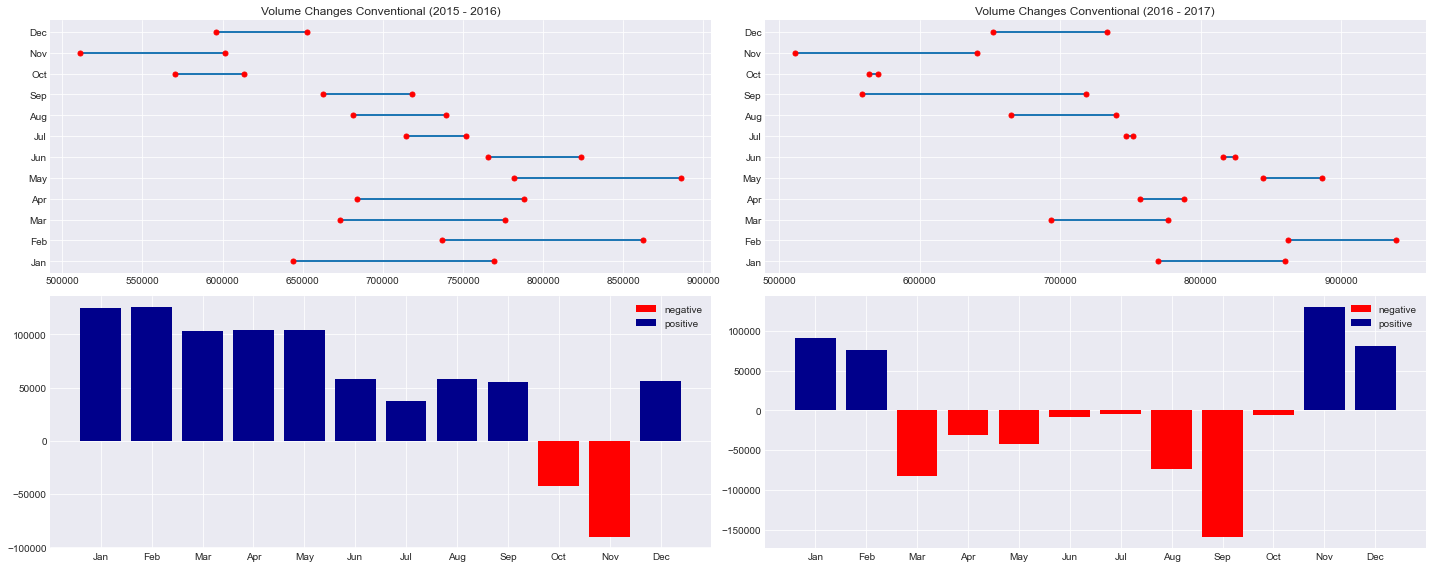

In [33]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
for ncol in range(2):
    ax[0, ncol].plot("Total Volume", "month_num",
               data = data[(data["type"] == "conventional") & ((data["year"] == 2015 + ncol) | (data["year"] == 2016 + ncol))].groupby(["month_num", "year"]).mean().reset_index(),
               marker = "o", markerfacecolor = "red", markeredgecolor = "red", markersize = 5, linewidth = 2)
    ax[1, ncol].bar("month_num", "diff_total_volume",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["type"] == "conventional") & (diff_mean["diff_total_volume"] < 0)], color = "red", label = "negative")
    ax[1, ncol].bar("month_num", "diff_total_volume",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["type"] == "conventional") & (diff_mean["diff_total_volume"] >= 0)], color = "darkblue", label = "positive")
    ax[0, ncol].set_title("Volume Changes Conventional (" + str(2015 + ncol) + " - " + str(2016 + ncol) + ")")
    ax[1, ncol].legend()
    plt.setp(ax[0, ncol], yticks = range(len(data["month_num"].unique())),
             yticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.setp(ax[1, ncol], xticks = diff_mean["month_num"].unique(),
             xticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

In [34]:
area_data = pd.read_csv("data/avocado.csv")
area_data = area_data.sort_values("Date")

In [35]:
area_data = area_data[(area_data["region"] == "West") | (area_data["region"] == "Southeast") | (area_data["region"] == "SouthCentral") | (area_data["region"] == "Northeast")]
area_data["month_num"] = area_data["Date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").month)
area_data["month"] = area_data["Date"].map(lambda x: x[:7])

change_type = ["type", "region", "year", "month", "month_num"]
for change in change_type:
    area_data[change] = area_data[change].astype("category")

area_data["Date"] = pd.to_datetime(area_data["Date"])

In [36]:
area_data = area_data.drop("Unnamed: 0", axis = 1)

In [37]:
area_data["TotalSales"] = area_data["AveragePrice"] * area_data["Total Volume"]

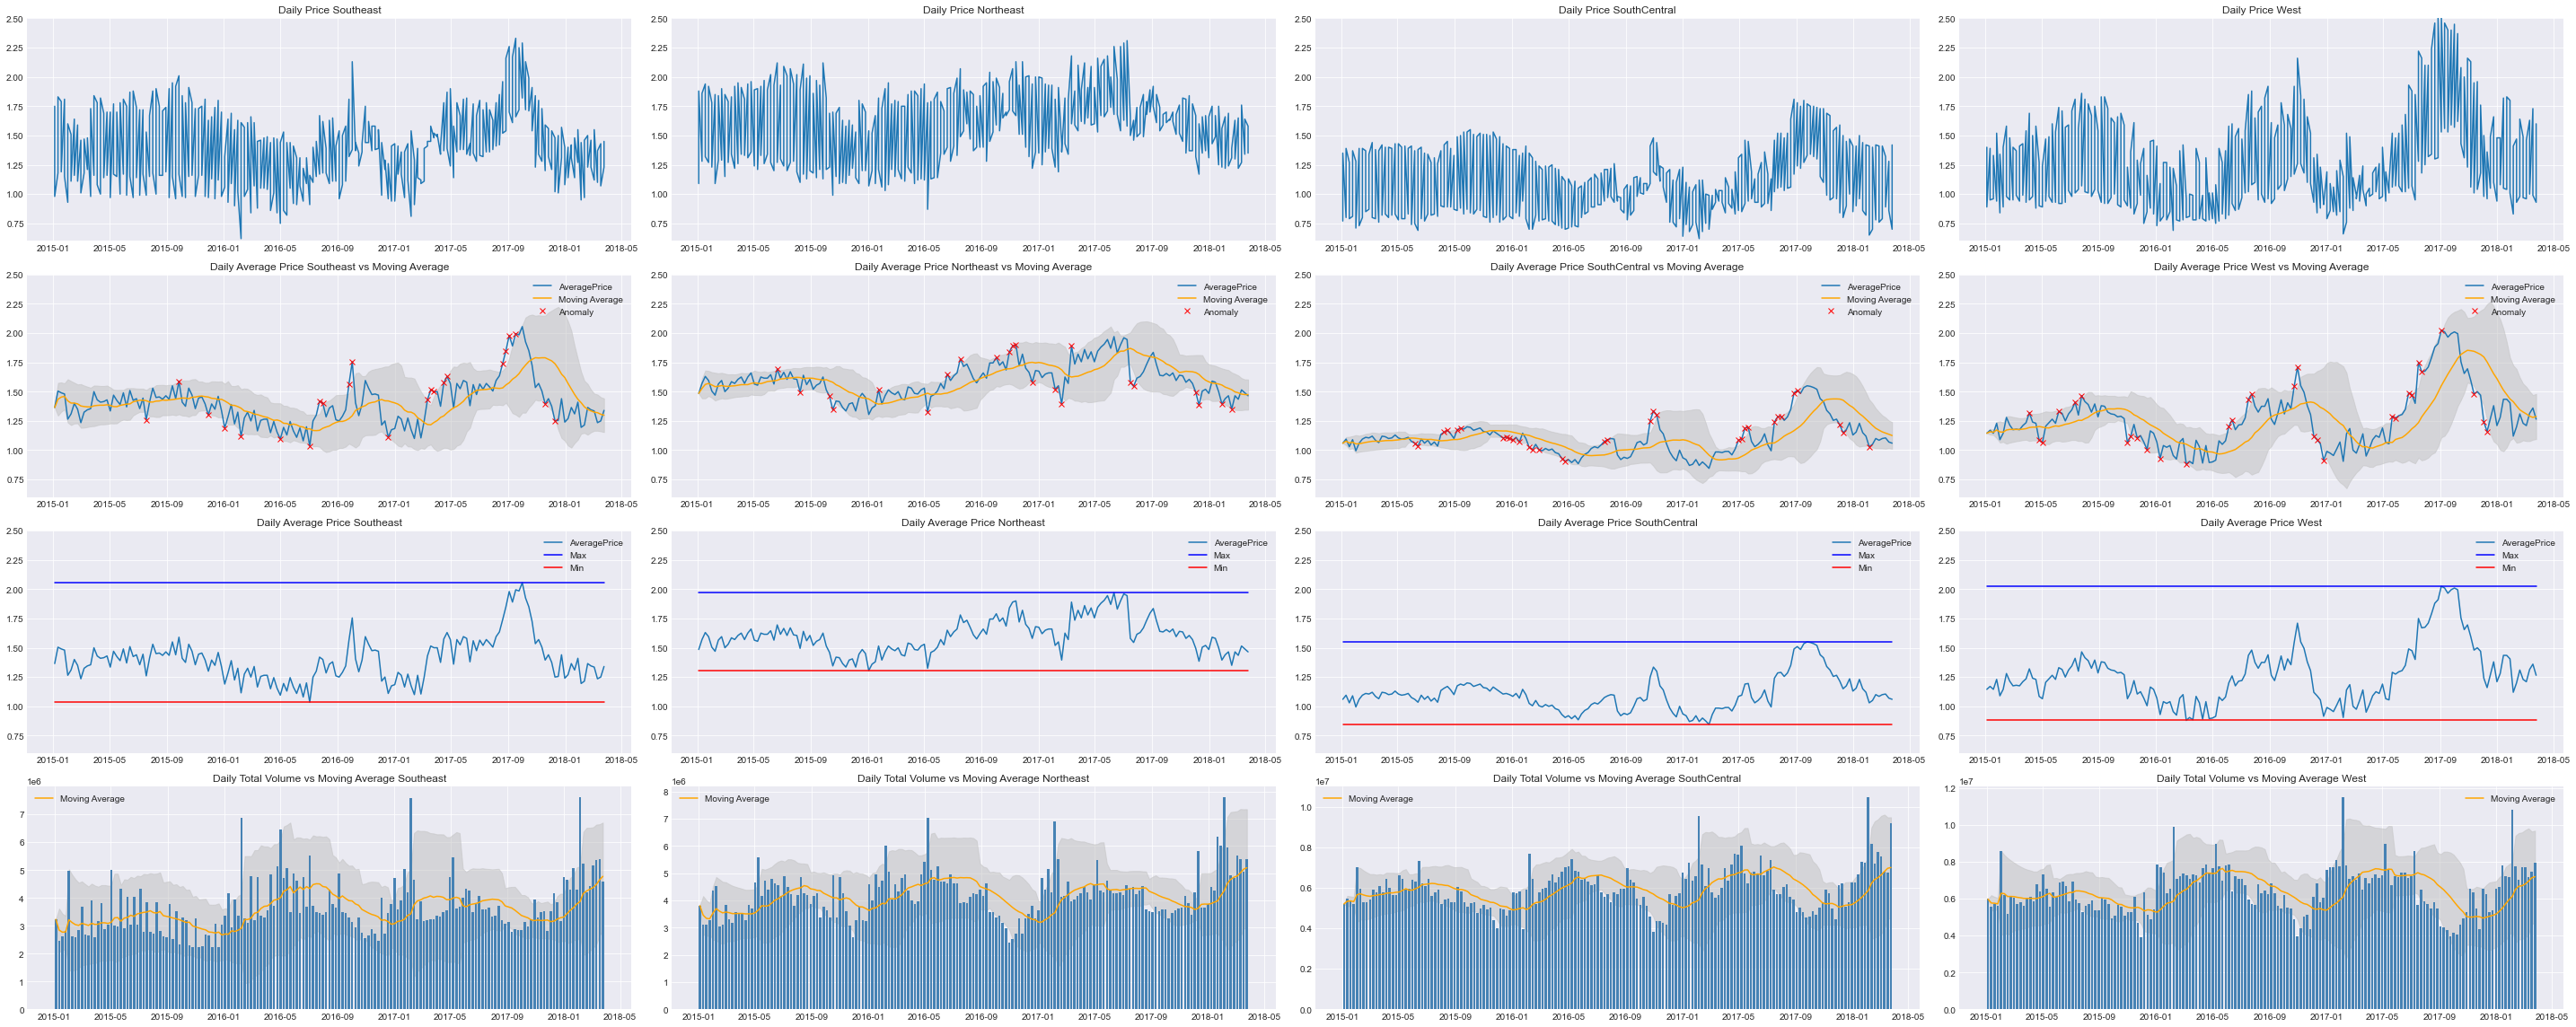

In [38]:
threshold = 2
window_size = 15
robust = False

fig, ax = plt.subplots(4, 4, figsize = (40, 16))
for ncol in range(len(area_data["region"].unique())):
    ax[0, ncol].plot(area_data[area_data["region"] == area_data["region"].unique()[ncol]]["Date"], area_data[area_data["region"] == area_data["region"].unique()[ncol]]["AveragePrice"])
    ax[0, ncol].set_title("Daily Price " + area_data["region"].unique()[ncol])
    ma_graph("AveragePrice", area_data[area_data["region"] == area_data["region"].unique()[ncol]].groupby("Date").mean().reset_index().dropna(),
             data_gr = "line", anomaly_gr = True, band = True, row = 1, col = ncol, title = "Daily Average Price " + area_data["region"].unique()[ncol] + " vs Moving Average")
    ma_graph("AveragePrice", area_data[area_data["region"] == area_data["region"].unique()[ncol]].groupby("Date").mean().reset_index().dropna(),
             data_gr = "line", anomaly_gr = False, band = False, row = 2, col = ncol, title = "Daily Average Price " + area_data["region"].unique()[ncol])
    ma_graph("Total Volume", area_data[area_data["region"] == area_data["region"].unique()[ncol]].groupby("Date").sum().reset_index().dropna(),
             data_gr = "bar", anomaly_gr = False, band = True, row = 3, col = ncol, title = "Daily Total Volume vs Moving Average " + area_data["region"].unique()[ncol])
    ax[0, ncol].set_ylim(0.6, 2.5)
    ax[1, ncol].set_ylim(0.6, 2.5)
    ax[2, ncol].set_ylim(0.6, 2.5)
plt.tight_layout()
plt.show()

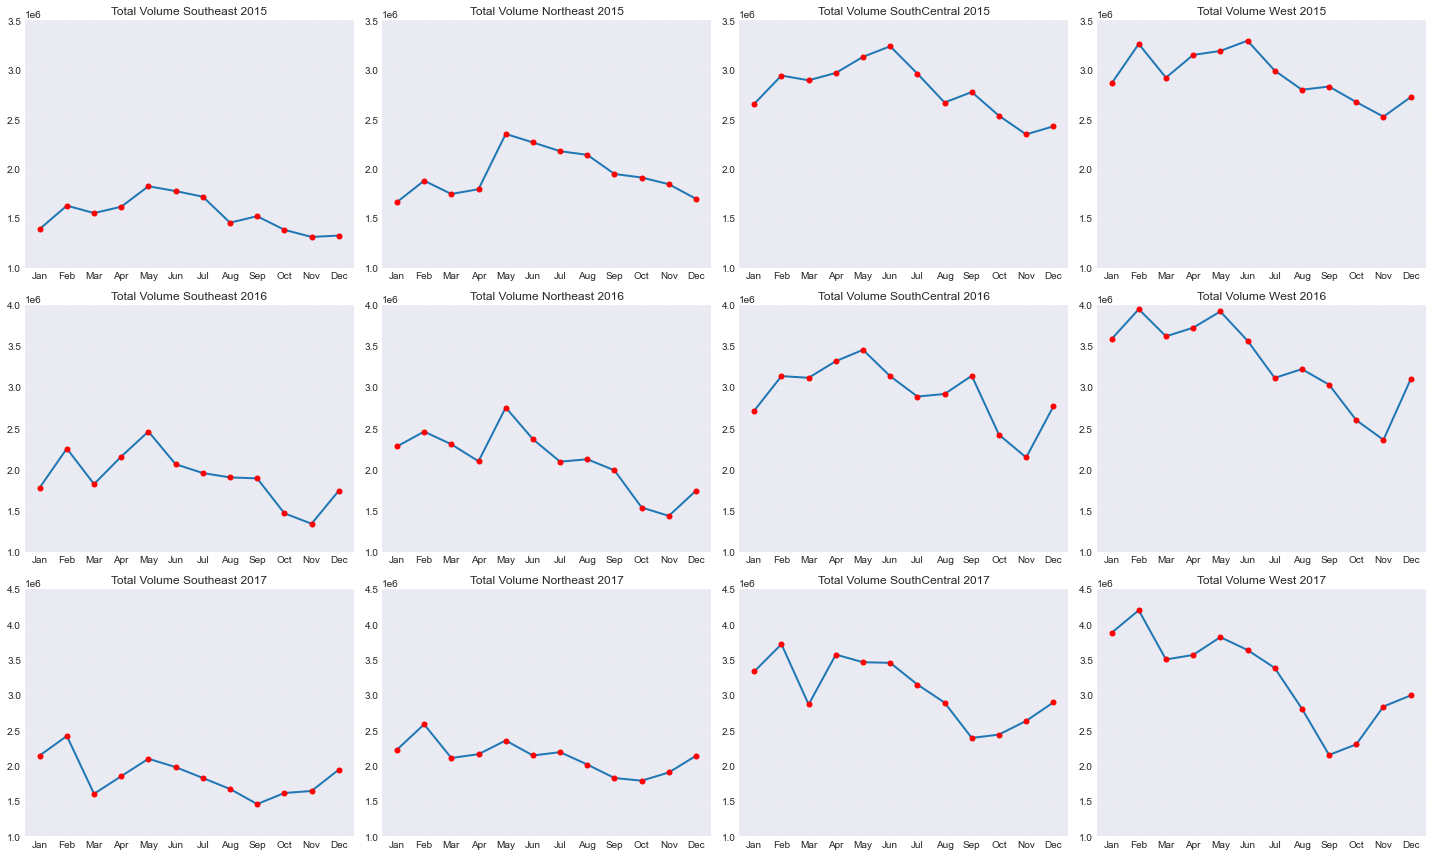

In [39]:
fig, ax = plt.subplots(3, 4, figsize = (20, 12))
for ncol in range(len(area_data["region"].unique())):
    for nrow in range(3):
        ax[nrow, ncol].plot("month_num", "Total Volume",
                            data = area_data[(area_data["region"] == area_data["region"].unique()[ncol]) & (area_data["year"] == 2015 + nrow)].groupby("month_num").mean().reset_index(),
                            marker = "o", markerfacecolor = "red", markeredgecolor = "red", markersize = 5, linewidth = 2)
        if nrow == 0:
            ax[nrow, ncol].set_ylim(1000000, 3500000)
        elif nrow == 1:
            ax[nrow, ncol].set_ylim(1000000, 4000000)
        else:
            ax[nrow, ncol].set_ylim(1000000, 4500000)
        ax[nrow, ncol].grid(alpha = 0.2)
        ax[nrow, ncol].set_title("Total Volume " + area_data["region"].unique()[ncol] + " " + str(2015 + nrow))

plt.setp(ax, xticks = range(len(data["month_num"].unique())),
         xticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

In [40]:
diff_mean = area_data[area_data["Date"] <= "2018-01-01"].groupby(["region", "month_num", "year"]).mean().reset_index()
diff_mean = diff_mean.dropna()
diff_mean["diff_total_volume"] = diff_mean["Total Volume"].diff()

In [41]:
diff_mean

region month_num  year  AveragePrice  Total Volume          4046  \
0    Northeast         1  2015       1.57000  1.661828e+06  5.307721e+04   
1    Northeast         1  2016       1.39100  2.280184e+06  4.970243e+04   
2    Northeast         1  2017       1.65300  2.226876e+06  1.039805e+05   
4    Northeast         2  2015       1.53375  1.878255e+06  5.719680e+04   
5    Northeast         2  2016       1.48625  2.460631e+06  5.946623e+04   
..         ...       ...   ...           ...           ...           ...   
185       West        11  2016       1.43250  2.360389e+06  8.609093e+05   
186       West        11  2017       1.51125  2.838154e+06  1.024864e+06   
188       West        12  2015       1.09625  2.723358e+06  1.007986e+06   
189       West        12  2016       1.04500  3.095652e+06  1.000170e+06   
190       West        12  2017       1.25200  2.995548e+06  9.960199e+05   

             4225         4770    Total Bags    Small Bags    Large Bags  \
0    1.154030e+06   3733.84000  4.509865e+05  405107.02500   45879.45000   
1    1.624556e+06  29972.26100  5.759533e+05  524628.74100   51129.17800   
2    1.535923e+06  61814.98600  5.251577e+05  490458.62200   32807.69300   
4    1.318525e+06   3928.86000  4.986040e+05  454611.82375   43992.00000   
5    1.750157e+06  45329.79625  6.056775e+05  554187.01000   51489.81250   
..            ...          ...           ...           ...           ...   
185  4.898382e+05  52433.19625  9.572085e+05  617676.45625  338380.85125   
186  6.725068e+05  42413.76625  1.098370e+06  574433.28125  518796.72750   
188  8.614958e+05  62247.60000  7.916281e+05  494643.00500  294327.61125   
189  6.586197e+05  46479.53625  1.390383e+06  932628.95000  455432.96250   
190  7.843449e+05  42485.17000  1.172698e+06  628529.34800  538965.36200   

     XLarge Bags    TotalSales  diff_total_volume  
0        0.00000  2.062535e+06                NaN  
1      195.39300  2.582576e+06       618356.04300  
2     1891.38500  3.039702e+06       -53307.82800  
4        0.20500  2.296086e+06      -348621.19750  
5        0.65250  2.760252e+06       582376.08750  
..           ...           ...                ...  
185   1151.19125  2.772875e+06      -165689.95775  
186   5139.65750  3.087280e+06       477765.00125  
188   2657.45125  2.281850e+06      -114796.64500  
189   2321.09250  2.785603e+06       372294.30000  
190   5202.99600  3.059855e+06      -100104.13750  

[144 rows x 14 columns]

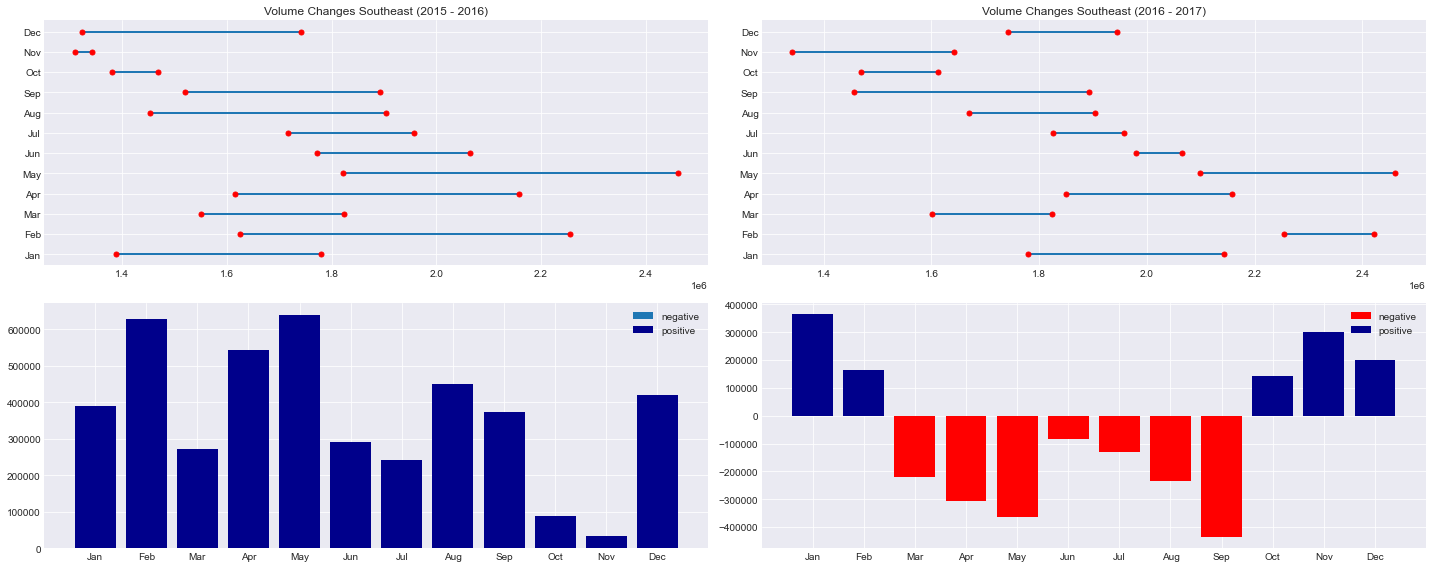

In [42]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
for ncol in range(2):
    ax[0, ncol].plot("Total Volume", "month_num",
               data = area_data[(area_data["region"] == "Southeast") & ((area_data["year"] == 2015 + ncol) | (area_data["year"] == 2016 + ncol))].groupby(["month_num", "year"]).mean().reset_index(),
               marker = "o", markerfacecolor = "red", markeredgecolor = "red", markersize = 5, linewidth = 2)
    ax[1, ncol].bar("month_num", "diff_total_volume",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["region"] == "Southeast") & (diff_mean["diff_total_volume"] < 0)], color = "red", label = "negative")
    ax[1, ncol].bar("month_num", "diff_total_volume",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["region"] == "Southeast") & (diff_mean["diff_total_volume"] >= 0)], color = "darkblue", label = "positive")
    ax[0, ncol].set_title("Volume Changes Southeast (" + str(2015 + ncol) + " - " + str(2016 + ncol) + ")")
    ax[1, ncol].legend()
    plt.setp(ax[0, ncol], yticks = range(len(area_data["month_num"].unique())),
             yticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.setp(ax[1, ncol], xticks = diff_mean["month_num"].unique(),
             xticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

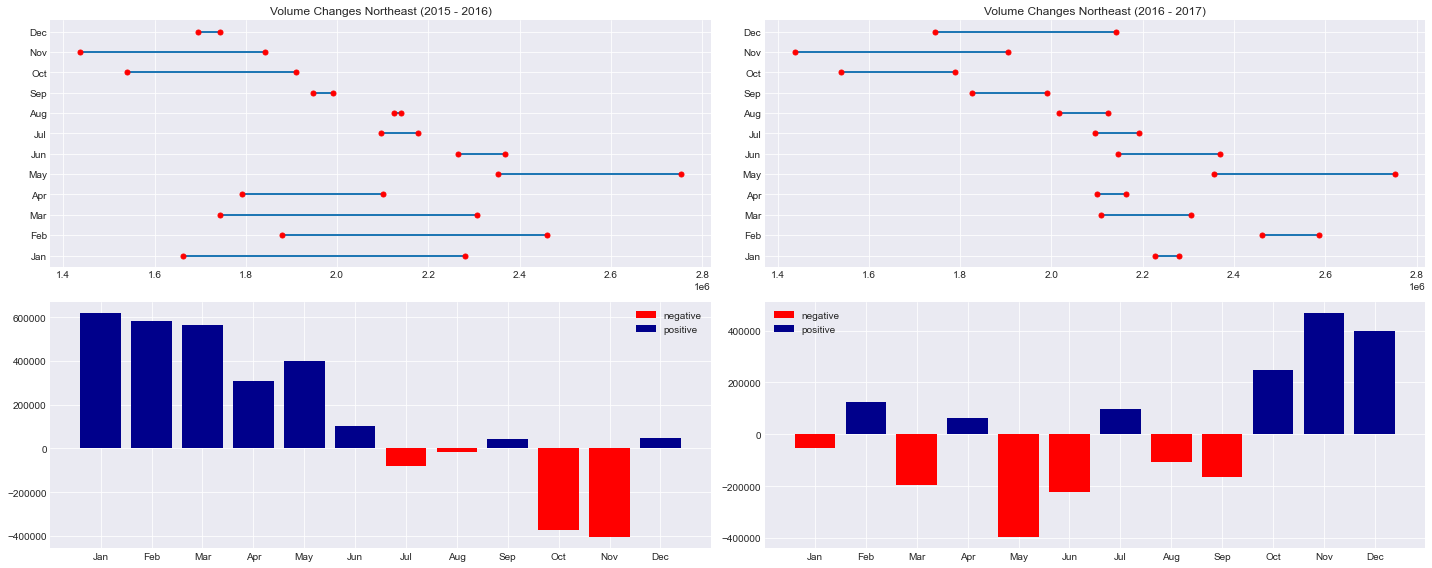

In [43]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
for ncol in range(2):
    ax[0, ncol].plot("Total Volume", "month_num",
               data = area_data[(area_data["region"] == "Northeast") & ((area_data["year"] == 2015 + ncol) | (area_data["year"] == 2016 + ncol))].groupby(["month_num", "year"]).mean().reset_index(),
               marker = "o", markerfacecolor = "red", markeredgecolor = "red", markersize = 5, linewidth = 2)
    ax[1, ncol].bar("month_num", "diff_total_volume",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["region"] == "Northeast") & (diff_mean["diff_total_volume"] < 0)], color = "red", label = "negative")
    ax[1, ncol].bar("month_num", "diff_total_volume",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["region"] == "Northeast") & (diff_mean["diff_total_volume"] >= 0)], color = "darkblue", label = "positive")
    ax[0, ncol].set_title("Volume Changes Northeast (" + str(2015 + ncol) + " - " + str(2016 + ncol) + ")")
    ax[1, ncol].legend()
    plt.setp(ax[0, ncol], yticks = range(len(area_data["month_num"].unique())),
             yticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.setp(ax[1, ncol], xticks = diff_mean["month_num"].unique(),
             xticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

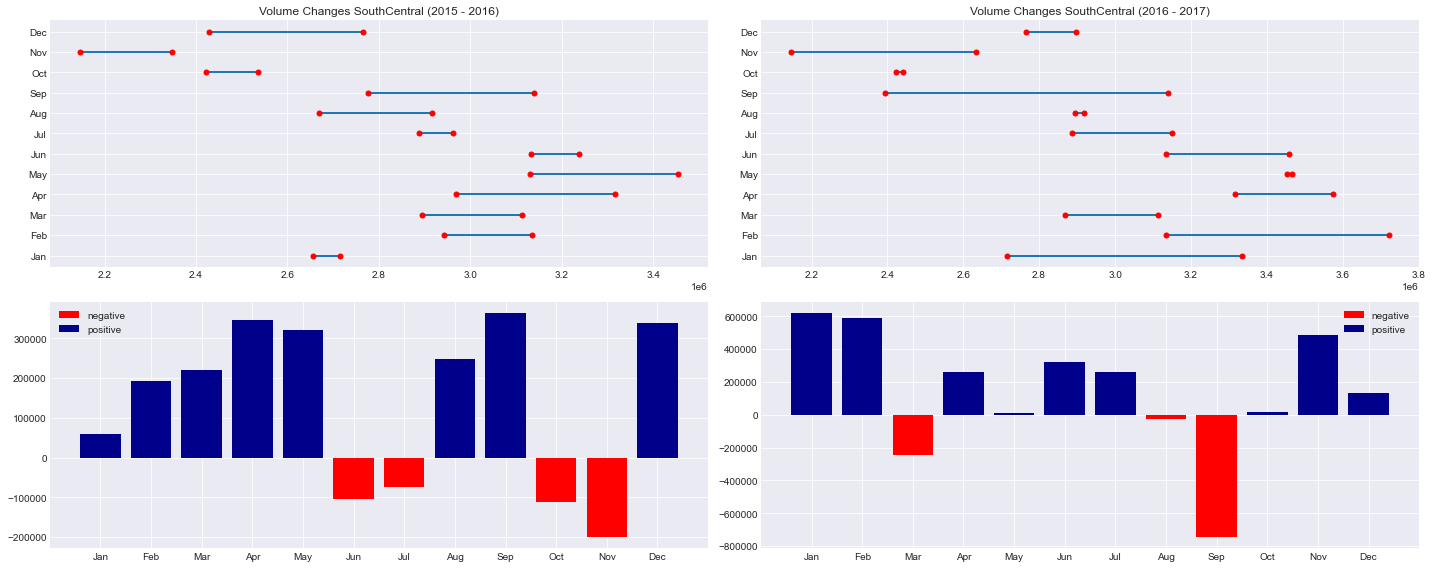

In [44]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
for ncol in range(2):
    ax[0, ncol].plot("Total Volume", "month_num",
               data = area_data[(area_data["region"] == "SouthCentral") & ((area_data["year"] == 2015 + ncol) | (area_data["year"] == 2016 + ncol))].groupby(["month_num", "year"]).mean().reset_index(),
               marker = "o", markerfacecolor = "red", markeredgecolor = "red", markersize = 5, linewidth = 2)
    ax[1, ncol].bar("month_num", "diff_total_volume",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["region"] == "SouthCentral") & (diff_mean["diff_total_volume"] < 0)], color = "red", label = "negative")
    ax[1, ncol].bar("month_num", "diff_total_volume",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["region"] == "SouthCentral") & (diff_mean["diff_total_volume"] >= 0)], color = "darkblue", label = "positive")
    ax[0, ncol].set_title("Volume Changes SouthCentral (" + str(2015 + ncol) + " - " + str(2016 + ncol) + ")")
    ax[1, ncol].legend()
    plt.setp(ax[0, ncol], yticks = range(len(area_data["month_num"].unique())),
             yticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.setp(ax[1, ncol], xticks = diff_mean["month_num"].unique(),
             xticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

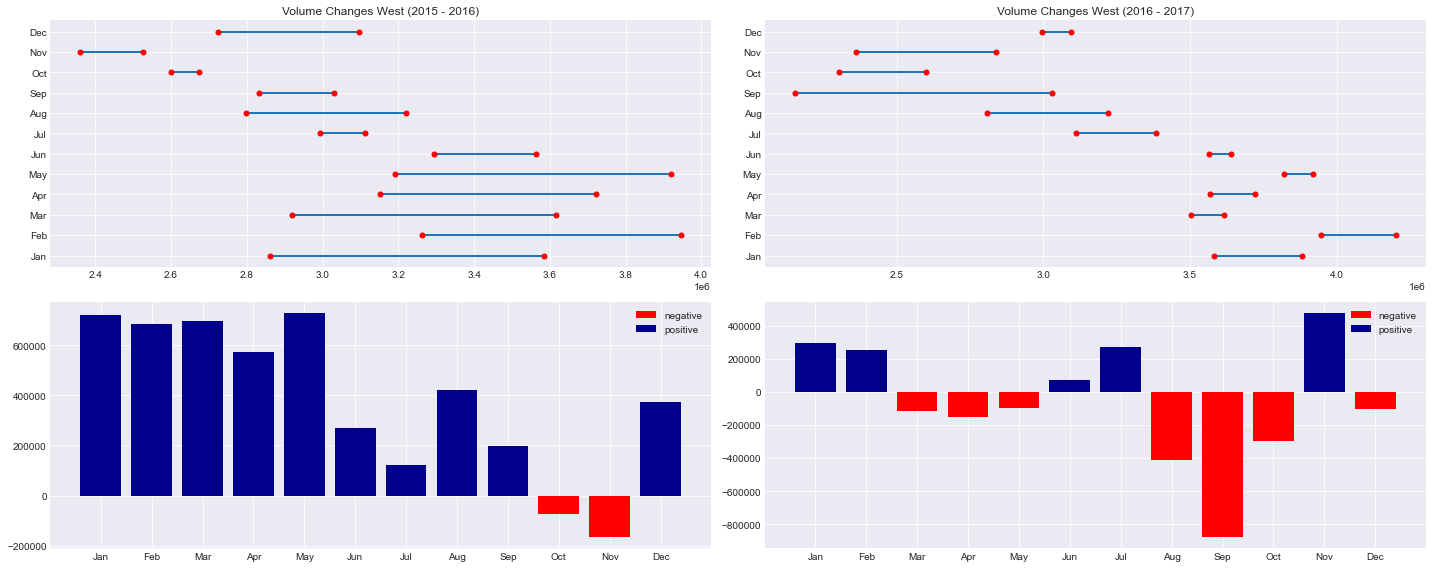

In [45]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
for ncol in range(2):
    ax[0, ncol].plot("Total Volume", "month_num",
               data = area_data[(area_data["region"] == "West") & ((area_data["year"] == 2015 + ncol) | (area_data["year"] == 2016 + ncol))].groupby(["month_num", "year"]).mean().reset_index(),
               marker = "o", markerfacecolor = "red", markeredgecolor = "red", markersize = 5, linewidth = 2)
    ax[1, ncol].bar("month_num", "diff_total_volume",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["region"] == "West") & (diff_mean["diff_total_volume"] < 0)], color = "red", label = "negative")
    ax[1, ncol].bar("month_num", "diff_total_volume",
        data = diff_mean[(diff_mean["year"] == 2016 + ncol) & (diff_mean["region"] == "West") & (diff_mean["diff_total_volume"] >= 0)], color = "darkblue", label = "positive")
    ax[0, ncol].set_title("Volume Changes West (" + str(2015 + ncol) + " - " + str(2016 + ncol) + ")")
    ax[1, ncol].legend()
    plt.setp(ax[0, ncol], yticks = range(len(area_data["month_num"].unique())),
             yticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.setp(ax[1, ncol], xticks = diff_mean["month_num"].unique(),
             xticklabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()

In [46]:
diff_mean_reg = data[["Total Volume", "year", "month_num","region"]].groupby(["year", "month_num","region"]).sum().reset_index().dropna().sort_values(["region", "year", "month_num"])
diff_mean_reg["%change"] = diff_mean_reg["Total Volume"].pct_change() * 100
diff_mean_reg = diff_mean_reg[(diff_mean_reg["year"] != 2015) | (diff_mean_reg["month_num"] != 1)]
diff_mean_reg = diff_mean_reg.groupby("region").mean().reset_index().sort_values("%change", ascending = False)

diff_mean_cou = area_data[["Total Volume", "year", "month_num","region"]].groupby(["year", "month_num","region"]).sum().reset_index().dropna().sort_values(["region", "year", "month_num"])
diff_mean_cou["%change"] = diff_mean_cou["Total Volume"].pct_change() * 100
diff_mean_cou = diff_mean_cou[(diff_mean_cou["year"] != 2015) | (diff_mean_cou["month_num"] != 1)]
diff_mean_cou = diff_mean_cou.groupby("region").mean().reset_index().sort_values("%change", ascending = False)

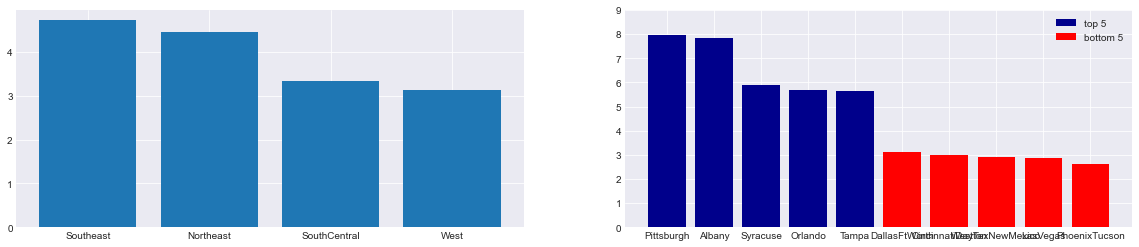

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (20, 4))
ax[0].bar("region", "%change", data = diff_mean_cou)
ax[1].bar("region", "%change", data = diff_mean_reg.head(5), color = "darkblue", label = "top 5")
ax[1].bar("region", "%change", data = diff_mean_reg.tail(5), color = "red", label = "bottom 5")
ax[1].legend()
ax[1].set_ylim(0, 9)
plt.show()

In [48]:
data_graph = data.groupby(["Date", "region"]).mean().reset_index().dropna()
data_graph = data_graph.sort_values(["region", "Date"])

In [49]:
model = sm.OLS(data_graph["Total Volume"], sm.add_constant(data_graph["AveragePrice"]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Volume   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     148.4
Date:                Sun, 06 Sep 2020   Prob (F-statistic):           7.57e-34
Time:                        20:51:34   Log-Likelihood:            -1.2119e+05
No. Observations:                8281   AIC:                         2.424e+05
Df Residuals:                    8279   BIC:                         2.424e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.519e+05   3.14e+04     23.943   

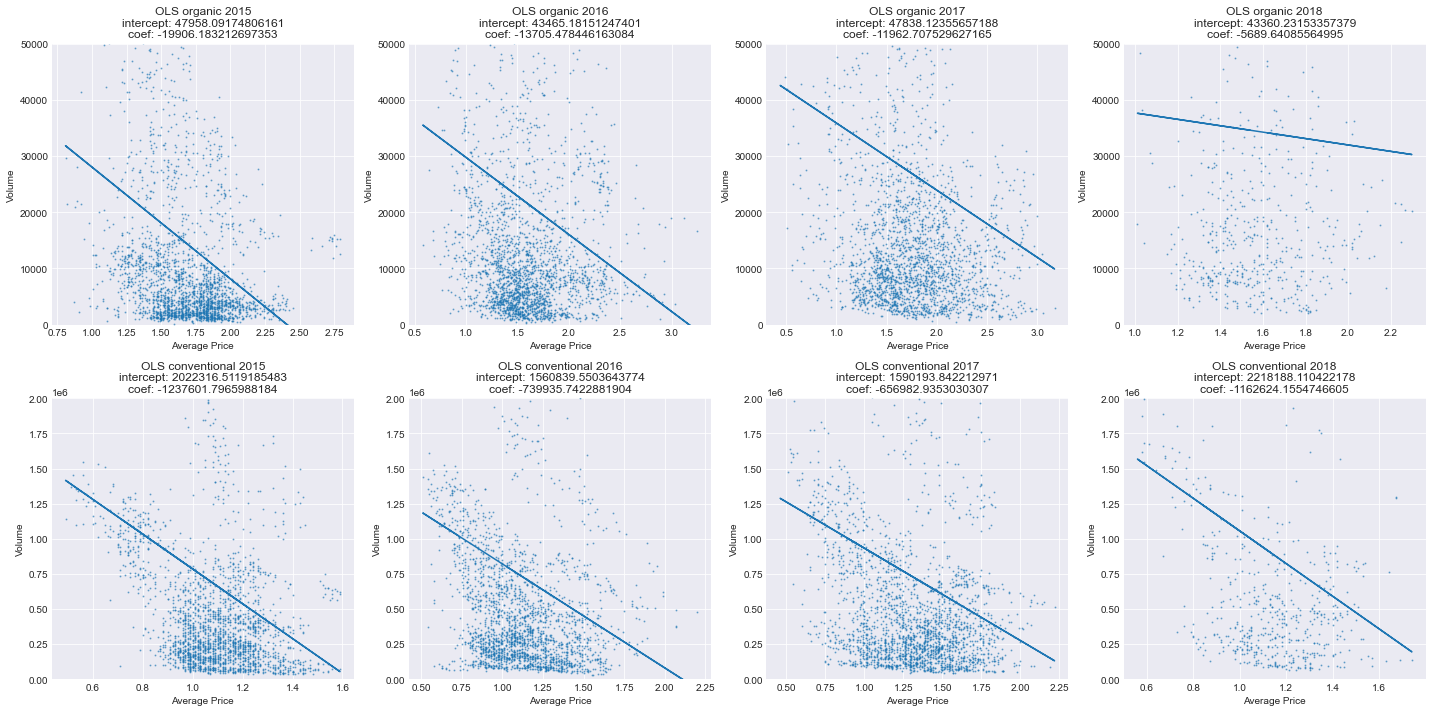

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

fig, ax = plt.subplots(2, 4, figsize = (20, 10))
for types in range(len(data["type"].unique())):
    for year in range(len(data["year"].unique())):
        data_graph = data[(data["type"] == data["type"].unique()[types]) & (data["year"] == data["year"].unique()[year])].groupby(["Date", "region"]).mean().reset_index().dropna()
        reg.fit(sm.add_constant(data_graph["AveragePrice"]), data_graph["Total Volume"])

        ax[types, year].scatter(data_graph["AveragePrice"], data_graph["Total Volume"], alpha = 0.5, s = 1)
        ax[types, year].plot(data_graph["AveragePrice"], (reg.coef_[1] * data_graph["AveragePrice"] + reg.intercept_))
        ax[types, year].set_title("OLS " + data["type"].unique()[types] + " " + str(data["year"].unique()[year]) + "\nintercept: " + str(reg.intercept_) + "\ncoef: " + str(reg.coef_[1]))
        ax[0, year].set_ylim(0, 50000)
        ax[1, year].set_ylim(0, 2000000)
        ax[types, year].set_xlabel("Average Price"), ax[types, year].set_ylabel("Volume")

plt.tight_layout()
plt.show()
fig.savefig('data_avocado_prices.png')

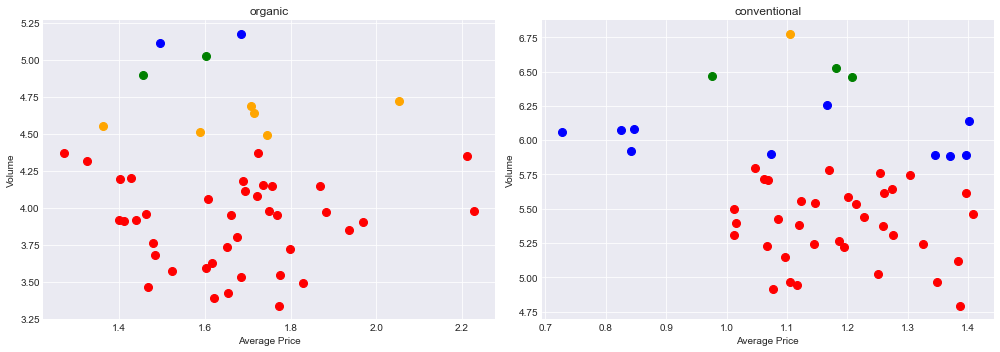

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 101)

fig, ax = plt.subplots(1, 2, figsize = (14, 5))
for types in range(len(data["type"].unique())):
    data_graph = data[(data["type"] == data["type"].unique()[types])].groupby("region").mean().reset_index().dropna()
    kmeans.fit(data_graph[["AveragePrice", "Total Volume"]])
    data_graph = pd.concat([data_graph, pd.DataFrame(kmeans.labels_)], axis = 1)
    for labels in range(len(data_graph[0].unique())):
        color = "red" if labels == 0 else "green" if labels == 1 else "orange" if labels == 2 else "blue"
        ax[types].plot(data_graph[data_graph[0] == labels]["AveragePrice"],
                             np.log10(data_graph[data_graph[0] == labels]["Total Volume"]),
                             "o", color = color, ms = 8)
    ax[types].set_title(data["type"].unique()[types])
    ax[types].set_xlabel("Average Price"), ax[types].set_ylabel("Volume")
plt.tight_layout()
plt.show()

---
## **2. PREPARE THE DATA**
---

**DATA CLEANING**

In [53]:
cleaned_df = data.copy()

In [54]:
def cleaning_iqr(data, features):
    for types in data["type"].unique():
        q3 = np.percentile(data[data["type"] == types][features], 75)
        q1 = np.percentile(data[data["type"] == types][features], 25)
        iqr = q3 - q1
        lower_whisker = q1 - 1.5 * iqr
        upper_whisker = q3 + 1.5 * iqr
        data = data[((data[features] >= lower_whisker) & (data[features] <= upper_whisker) & (data["type"] == types)) | (data["type"] != types)]
    return data

In [55]:
cleaned_df = cleaning_iqr(cleaned_df, "AveragePrice")
cleaned_df = cleaning_iqr(cleaned_df, "Total Volume")

In [56]:
cleaned_df = cleaned_df[["AveragePrice", "type", "Total Volume"]]

In [57]:
cleaned_df["type"] = pd.get_dummies(cleaned_df["type"], drop_first = True)

In [58]:
X = cleaned_df.drop("Total Volume", axis = 1).values
y = np.log10(cleaned_df["Total Volume"]).values

**FEATURE SCALING**

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
## **3. EXPLORE MANY DIFFERENT MODELS**
---

In [63]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [64]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [65]:
reg.score(X_test, y_test)

0.824863296540429

In [66]:
auto_reg = data.copy()

In [67]:
auto_reg = cleaning_iqr(auto_reg, "AveragePrice")
auto_reg = cleaning_iqr(auto_reg, "Total Volume")

In [68]:
auto_reg = auto_reg[auto_reg["type"] == "organic"].groupby("Date").mean().reset_index().dropna()

In [69]:
auto_reg

Date  AveragePrice  Total Volume         4046         4225  \
0   2015-01-04      1.613111   8298.050444  2682.797111  3463.258222   
1   2015-01-11      1.660889   9151.457556  3162.378667  4129.658444   
2   2015-01-18      1.676000   9549.222000  3555.813333  4196.894222   
3   2015-01-25      1.694565   8162.077609  3057.404348  3210.607174   
4   2015-02-01      1.570682   9124.955682  2919.348636  3732.102045   
..         ...           ...           ...          ...          ...   
164 2018-02-25      1.582439  15328.949512  1392.470244  3377.982195   
165 2018-03-04      1.574286  16330.614286  1438.601905  4080.557619   
166 2018-03-11      1.543000  17119.466250  1431.778250  4104.993250   
167 2018-03-18      1.530714  18680.605476  1529.582619  4628.319762   
168 2018-03-25      1.542439  17115.867805  1289.462683  3351.240488   

          4770    Total Bags    Small Bags   Large Bags  XLarge Bags  \
0    73.300889   2078.694222   1469.694000   609.000222     0.000000   
1    62.732222   1796.688222   1408.512222   388.176000     0.000000   
2    66.156000   1730.358444   1340.898444   389.460000     0.000000   
3    78.516087   1815.550000   1310.991304   504.558696     0.000000   
4    98.565227   2374.939773   1708.837273   666.102500     0.000000   
..         ...           ...           ...          ...          ...   
164  12.954634  10541.939024   8804.631707  1733.632195     3.675122   
165  17.762857  10787.920476   9288.963571  1498.222381     0.734524   
166  17.927500  11564.192250  10029.439000  1534.753250     0.000000   
167  16.709286  12505.674048   9744.095000  2757.632619     3.946429   
168  11.995610  12456.394878  10526.453171  1929.081463     0.860244   

       TotalSales  
0    12340.831660  
1    13415.488802  
2    13819.026404  
3    12591.672602  
4    13157.693732  
..            ...  
164  24359.729985  
165  25594.766836  
166  26491.744430  
167  28852.136717  
168  26173.598995  

[169 rows x 11 columns]

In [70]:
auto_reg = auto_reg.set_index("Date").reset_index()

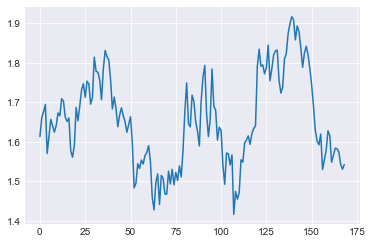

In [71]:
plt.plot(auto_reg["AveragePrice"])

In [72]:
X = auto_reg["AveragePrice"].values
result = adfuller(X)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical values:")
for key, value in result[4].items():
    print("\t%s: %.3f" %(key, value))
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time Series is Stationary")
else:
    print("Failed to reject H0 - Time Series is non Stationary")

ADF Statistic: -3.146807883527327
p-value: 0.023277595921621815
Critical values:
	1%: -3.473
	5%: -2.880
	10%: -2.577
Reject H0 - Time Series is Stationary


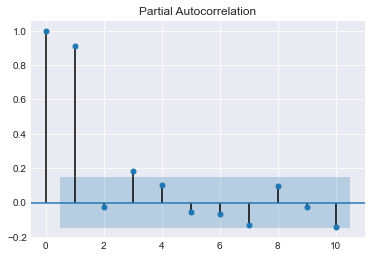

In [73]:
fig = plot_pacf(X, lags = 10)

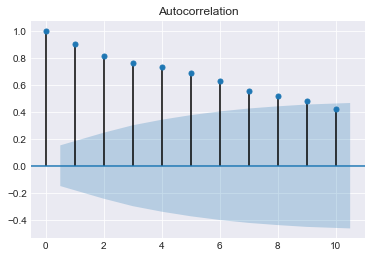

In [74]:
fig = plot_acf(X, lags = 10)

In [75]:
auto_reg["Price_shifted"] = auto_reg["AveragePrice"].shift(periods = 1)
auto_reg["price_diff"] = auto_reg["AveragePrice"].diff(periods = 1)
auto_reg["Volume_shifted"] = auto_reg["Total Volume"].shift(periods = 1)
auto_reg["volume_diff"] = auto_reg["Total Volume"].diff(periods = 1)

In [76]:
auto_reg.drop("Date", axis = 1, inplace = True)

In [77]:
auto_reg.dropna(inplace = True)

In [78]:
auto_reg

AveragePrice  Total Volume         4046         4225       4770  \
1        1.660889   9151.457556  3162.378667  4129.658444  62.732222   
2        1.676000   9549.222000  3555.813333  4196.894222  66.156000   
3        1.694565   8162.077609  3057.404348  3210.607174  78.516087   
4        1.570682   9124.955682  2919.348636  3732.102045  98.565227   
5        1.615000   8898.096818  2915.040227  3106.183409  88.920455   
..            ...           ...          ...          ...        ...   
164      1.582439  15328.949512  1392.470244  3377.982195  12.954634   
165      1.574286  16330.614286  1438.601905  4080.557619  17.762857   
166      1.543000  17119.466250  1431.778250  4104.993250  17.927500   
167      1.530714  18680.605476  1529.582619  4628.319762  16.709286   
168      1.542439  17115.867805  1289.462683  3351.240488  11.995610   

       Total Bags    Small Bags   Large Bags  XLarge Bags    TotalSales  \
1     1796.688222   1408.512222   388.176000     0.000000  13415.488802   
2     1730.358444   1340.898444   389.460000     0.000000  13819.026404   
3     1815.550000   1310.991304   504.558696     0.000000  12591.672602   
4     2374.939773   1708.837273   666.102500     0.000000  13157.693732   
5     2787.952727   2388.763864   399.188864     0.000000  13579.576525   
..            ...           ...          ...          ...           ...   
164  10541.939024   8804.631707  1733.632195     3.675122  24359.729985   
165  10787.920476   9288.963571  1498.222381     0.734524  25594.766836   
166  11564.192250  10029.439000  1534.753250     0.000000  26491.744430   
167  12505.674048   9744.095000  2757.632619     3.946429  28852.136717   
168  12456.394878  10526.453171  1929.081463     0.860244  26173.598995   

     Price_shifted  price_diff  Volume_shifted  volume_diff  
1         1.613111    0.047778     8298.050444   853.407111  
2         1.660889    0.015111     9151.457556   397.764444  
3         1.676000    0.018565     9549.222000 -1387.144391  
4         1.694565   -0.123883     8162.077609   962.878073  
5         1.570682    0.044318     9124.955682  -226.858864  
..             ...         ...             ...          ...  
164       1.583750   -0.001311    14854.441000   474.508512  
165       1.582439   -0.008153    15328.949512  1001.664774  
166       1.574286   -0.031286    16330.614286   788.851964  
167       1.543000   -0.012286    17119.466250  1561.139226  
168       1.530714    0.011725    18680.605476 -1564.737671  

[168 rows x 14 columns]

In [79]:
X = auto_reg["AveragePrice"].values
y = auto_reg["Price_shifted"].values

In [80]:
train_size = int(len(X) * 0.8)

In [81]:
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [82]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [83]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [84]:
lr.coef_

array([0.87255168])

In [85]:
lr.coef_

array([0.87255168])

In [86]:
y_pred = lr.predict(X_test)

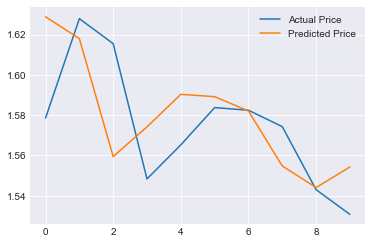

In [87]:
plt.plot(y_test[-10:], label = "Actual Price")
plt.plot(y_pred[-10:], label = "Predicted Price")
plt.legend()
plt.show()

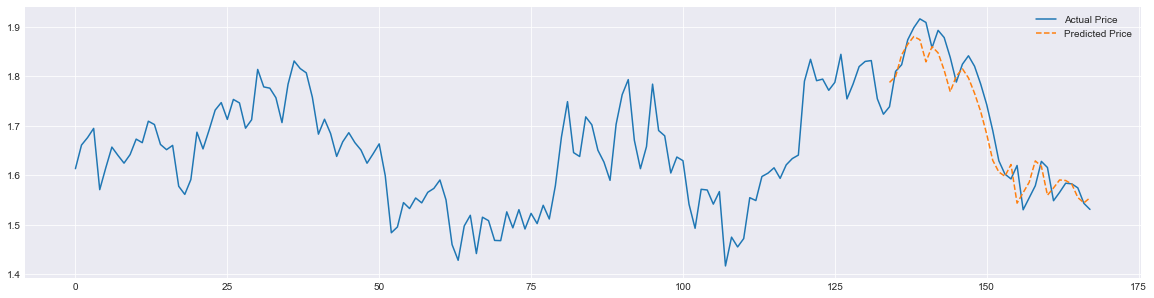

In [88]:
plt.figure(figsize = (20, 5))
plt.plot(np.append(y_train, y_test), label = "Actual Price")
plt.plot(np.append(np.array([None] * len(y_train)), y_pred), "--", label = "Predicted Price")
plt.legend()
plt.show()

In [89]:
model = ARIMA(y_test, order = (1, 1, 1))

In [90]:
model_fit = model.fit(disp = 5)

In [91]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   33
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  61.588
Method:                       css-mle   S.D. of innovations              0.037
Date:                Sun, 06 Sep 2020   AIC                           -115.176
Time:                        23:38:38   BIC                           -109.190
Sample:                             1   HQIC                          -113.162
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0073      0.005     -1.556      0.120      -0.016       0.002
ar.L1.D.y      0.9370      0.097      9.682      0.000       0.747       1.127
ma.L1.D.y     -1.0000      0.065    -15.275      0.0

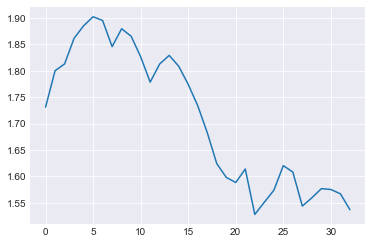

In [92]:
predictions = model_fit.predict(exog = X_test, typ = "levels")
#predictions = model_fit.predict(start = 68, typ = "levels")
plt.plot(predictions)

In [93]:
len(predictions)

33

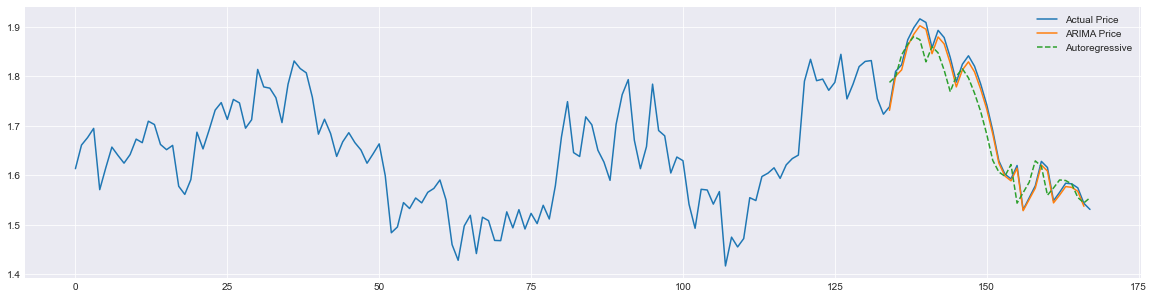

In [94]:
plt.figure(figsize = (20, 5))
plt.plot(np.append(y_train, y_test), label = "Actual Price")
plt.plot(np.append(np.array([None] * len(y_train)), predictions), label = "ARIMA Price")
plt.plot(np.append(np.array([None] * len(y_train)), y_pred), "--", label = "Autoregressive")
plt.legend()
plt.show()

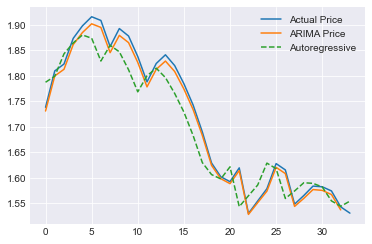

In [95]:
plt.plot(y_test, label = "Actual Price")
plt.plot(predictions, label = "ARIMA Price")
plt.plot(y_pred, "--", label = "Autoregressive")
plt.legend()
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
mean_squared_error(y_test, y_pred)

0.0016345074097637905

In [98]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.040429041662693295